# Importing the Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

import numpy as np
import pandas as pd
import os
import shutil as sh
from IPython.display import Image
import torch


In [4]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [5]:
!unzip "/content/drive/MyDrive/4/acdcfogg.v3i.yolov5pytorch.zip" -d "/content/drive/MyDrive/4/data"

Archive:  /content/drive/MyDrive/4/acdcfogg.v3i.yolov5pytorch.zip
 extracting: /content/drive/MyDrive/4/data/README.dataset.txt  
 extracting: /content/drive/MyDrive/4/data/README.roboflow.txt  
 extracting: /content/drive/MyDrive/4/data/data.yaml  
   creating: /content/drive/MyDrive/4/data/test/
   creating: /content/drive/MyDrive/4/data/test/images/
 extracting: /content/drive/MyDrive/4/data/test/images/GOPR0475_frame_000300_rgb_anon_png.rf.bfa6bd4a07fa77a7f8112d6236838651.jpg  
 extracting: /content/drive/MyDrive/4/data/test/images/GOPR0475_frame_000508_rgb_anon_png.rf.f12728dc4a653ea58b0fc8cdc78bd2f8.jpg  
 extracting: /content/drive/MyDrive/4/data/test/images/GOPR0475_frame_000550_rgb_anon_png.rf.fe1a6585036a859204d3642788a14725.jpg  
 extracting: /content/drive/MyDrive/4/data/test/images/GOPR0475_frame_000606_rgb_anon_png.rf.169c0e9dc84954e2c9a95832a6dd6cb3.jpg  
 extracting: /content/drive/MyDrive/4/data/test/images/GOPR0475_frame_000670_rgb_anon_png.rf.355a22ce18b33c65d907cab1

# Cloning YoloV5 git Repo

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16114, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16114 (delta 8), reused 10 (delta 1), pack-reused 16089
Receiving objects: 100% (16114/16114), 14.79 MiB | 21.15 MiB/s, done.
Resolving deltas: 100% (11032/11032), done.


In [6]:
%cd /content/yolov5/

/content/yolov5


# Installing YoloV5 requirements files

In [7]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


# Downloading dataset.yaml file from google cloud for the dataset

In [8]:
with open(r'/content/drive/MyDrive/4/data/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/4/data/train/images\n', 'val: /content/drive/MyDrive/4/data/valid/images\n', '\n', '\n', 'nc: 10\n', "names: ['0- person', '1- bicycle', '2- car', '3- motorcycle', '4- airplane', '5- bus', '6- train', '7- truck', '8- boat', '9- traffic light']\n", '\n', 'roboflow:\n', '  workspace: debasiskumaredugmailcom-oadi4\n', '  project: acdcfogg\n', '  version: 3\n', '  license: CC BY 4.0\n', '  url: https://universe.roboflow.com/debasiskumaredugmailcom-oadi4/acdcfogg/dataset/3']


In [2]:
ML_Model = []
precision = []
recall = []
mAP = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    precision.append(round(a, 3))
    recall.append(round(b, 3))
    mAP.append(round(c, 3))

# Yolo V5x6

In [9]:
!wandb disabled
!python train.py --img 415 --batch 2 --epochs 50 --data /content/drive/MyDrive/4/data/data.yaml --weights yolov5x6.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2023-12-26 18:52:53.559496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 18:52:53.559539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 18:52:53.560946: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x6.pt, cfg=, data=/content/drive/MyDrive/4/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=2, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False,

In [3]:
p_yol5 = 0.535
r_yol5 = 0.576
mAP_yolo5 = 0.628

storeResults('YoloV5x6',p_yol5,r_yol5,mAP_yolo5)

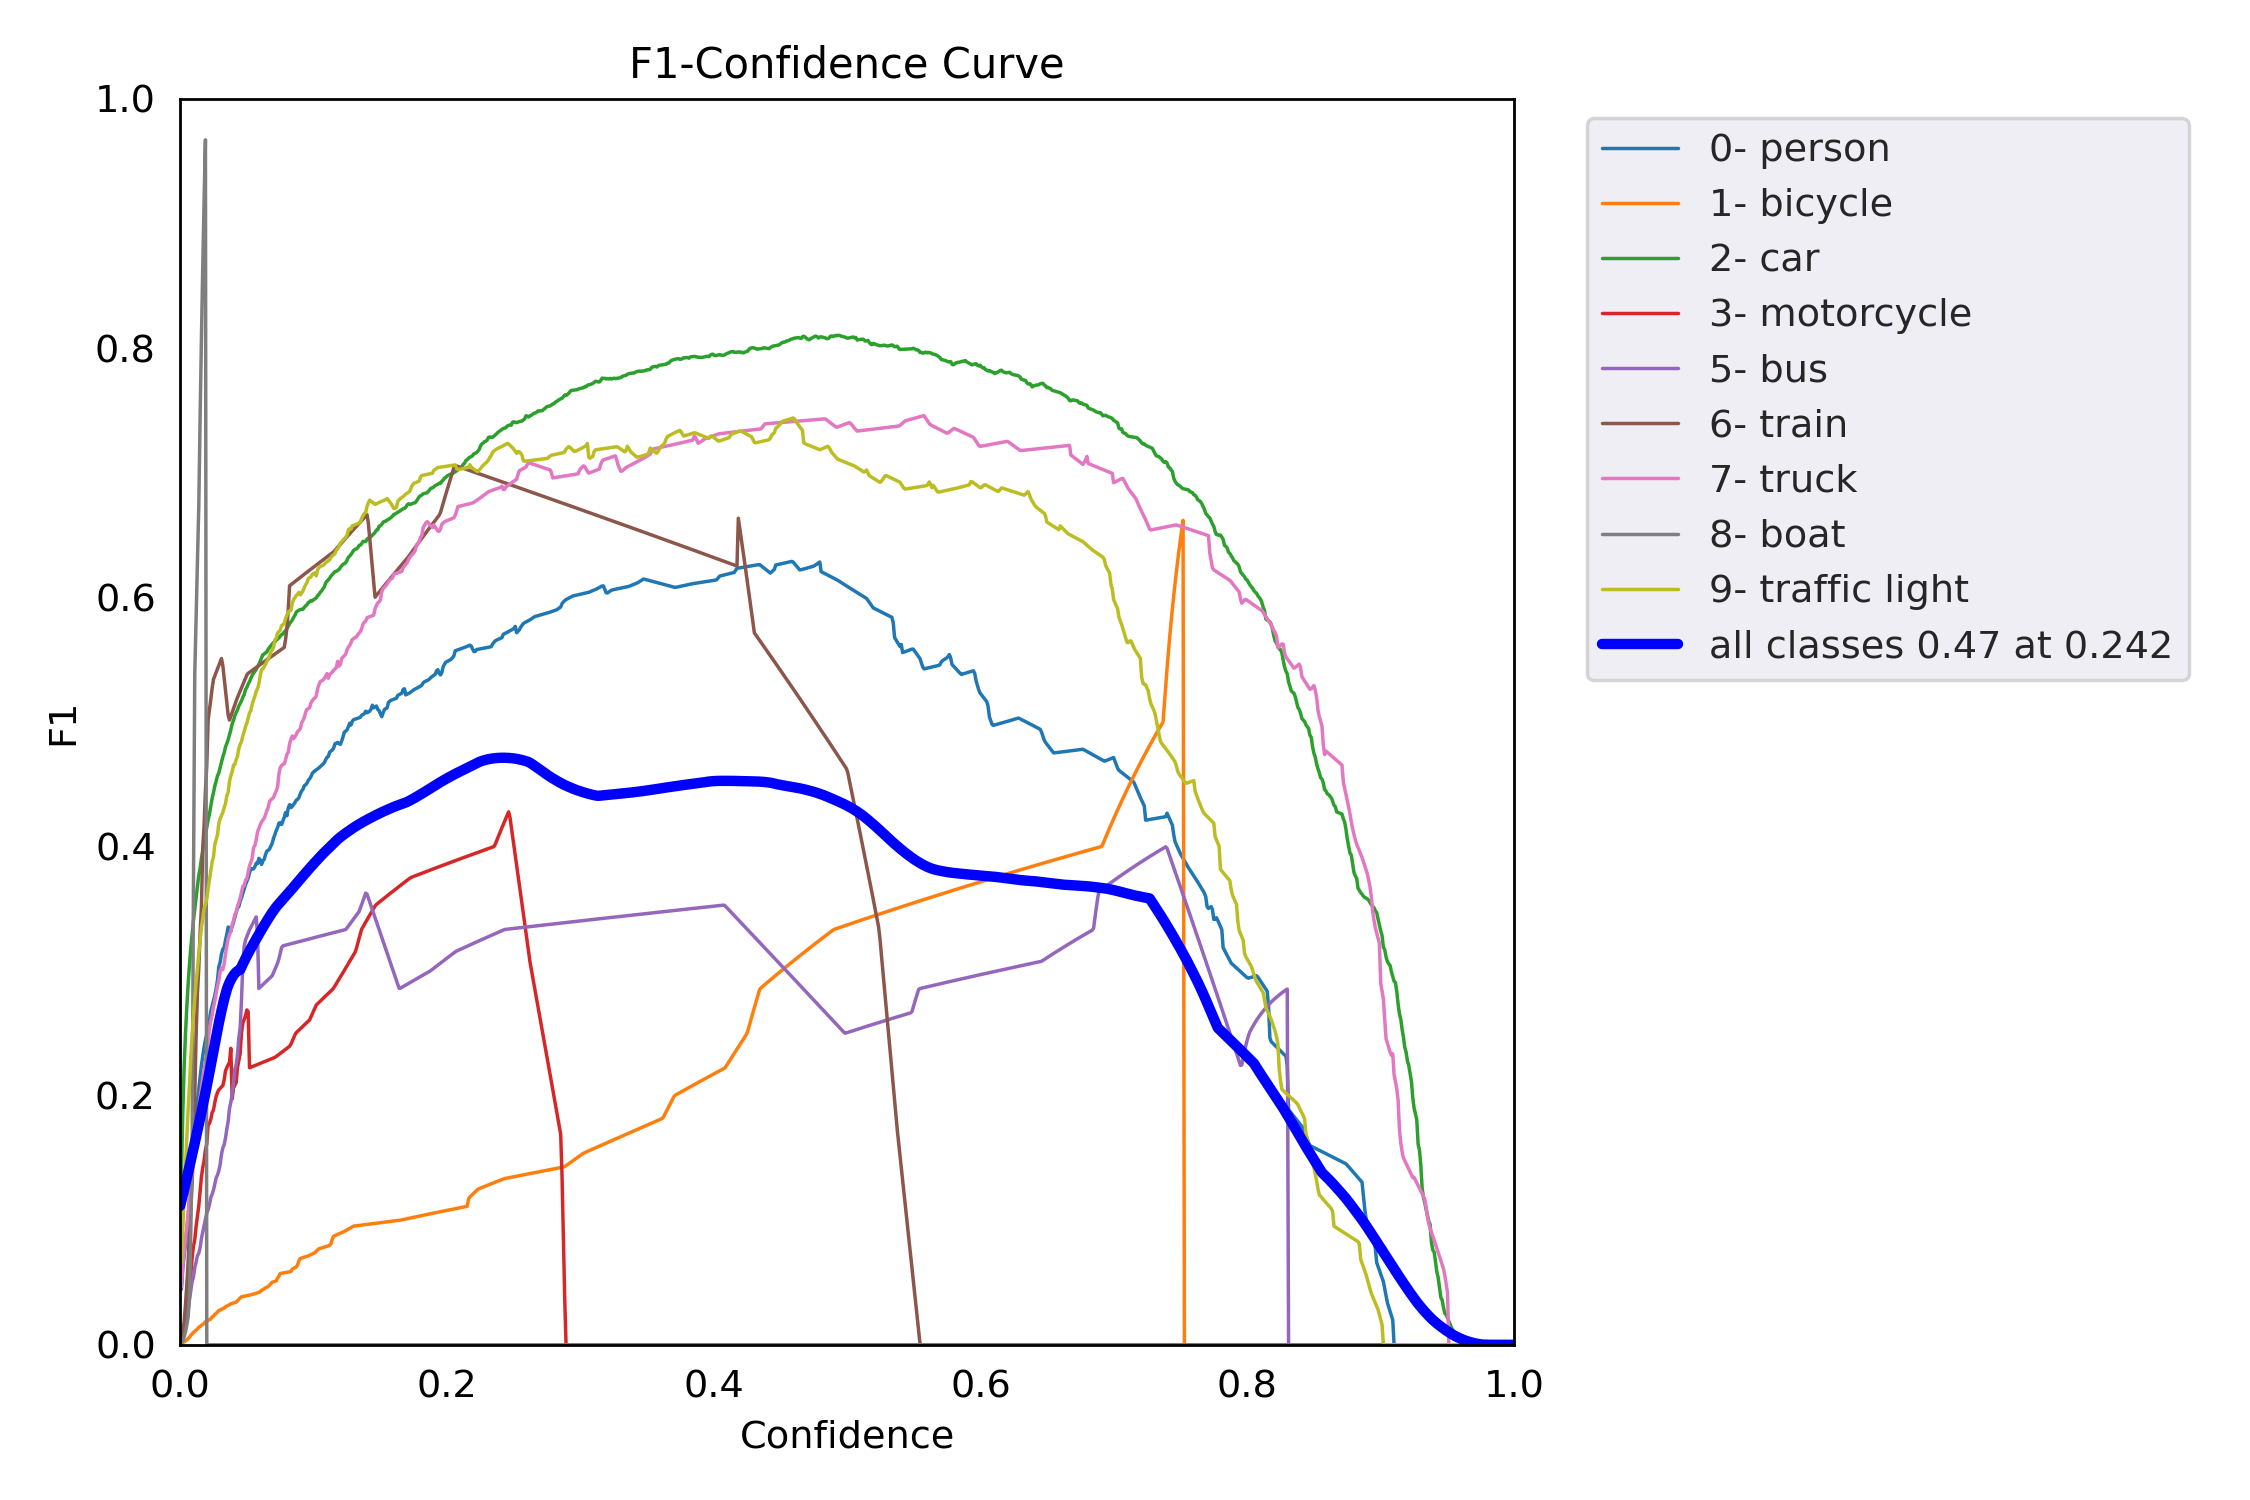

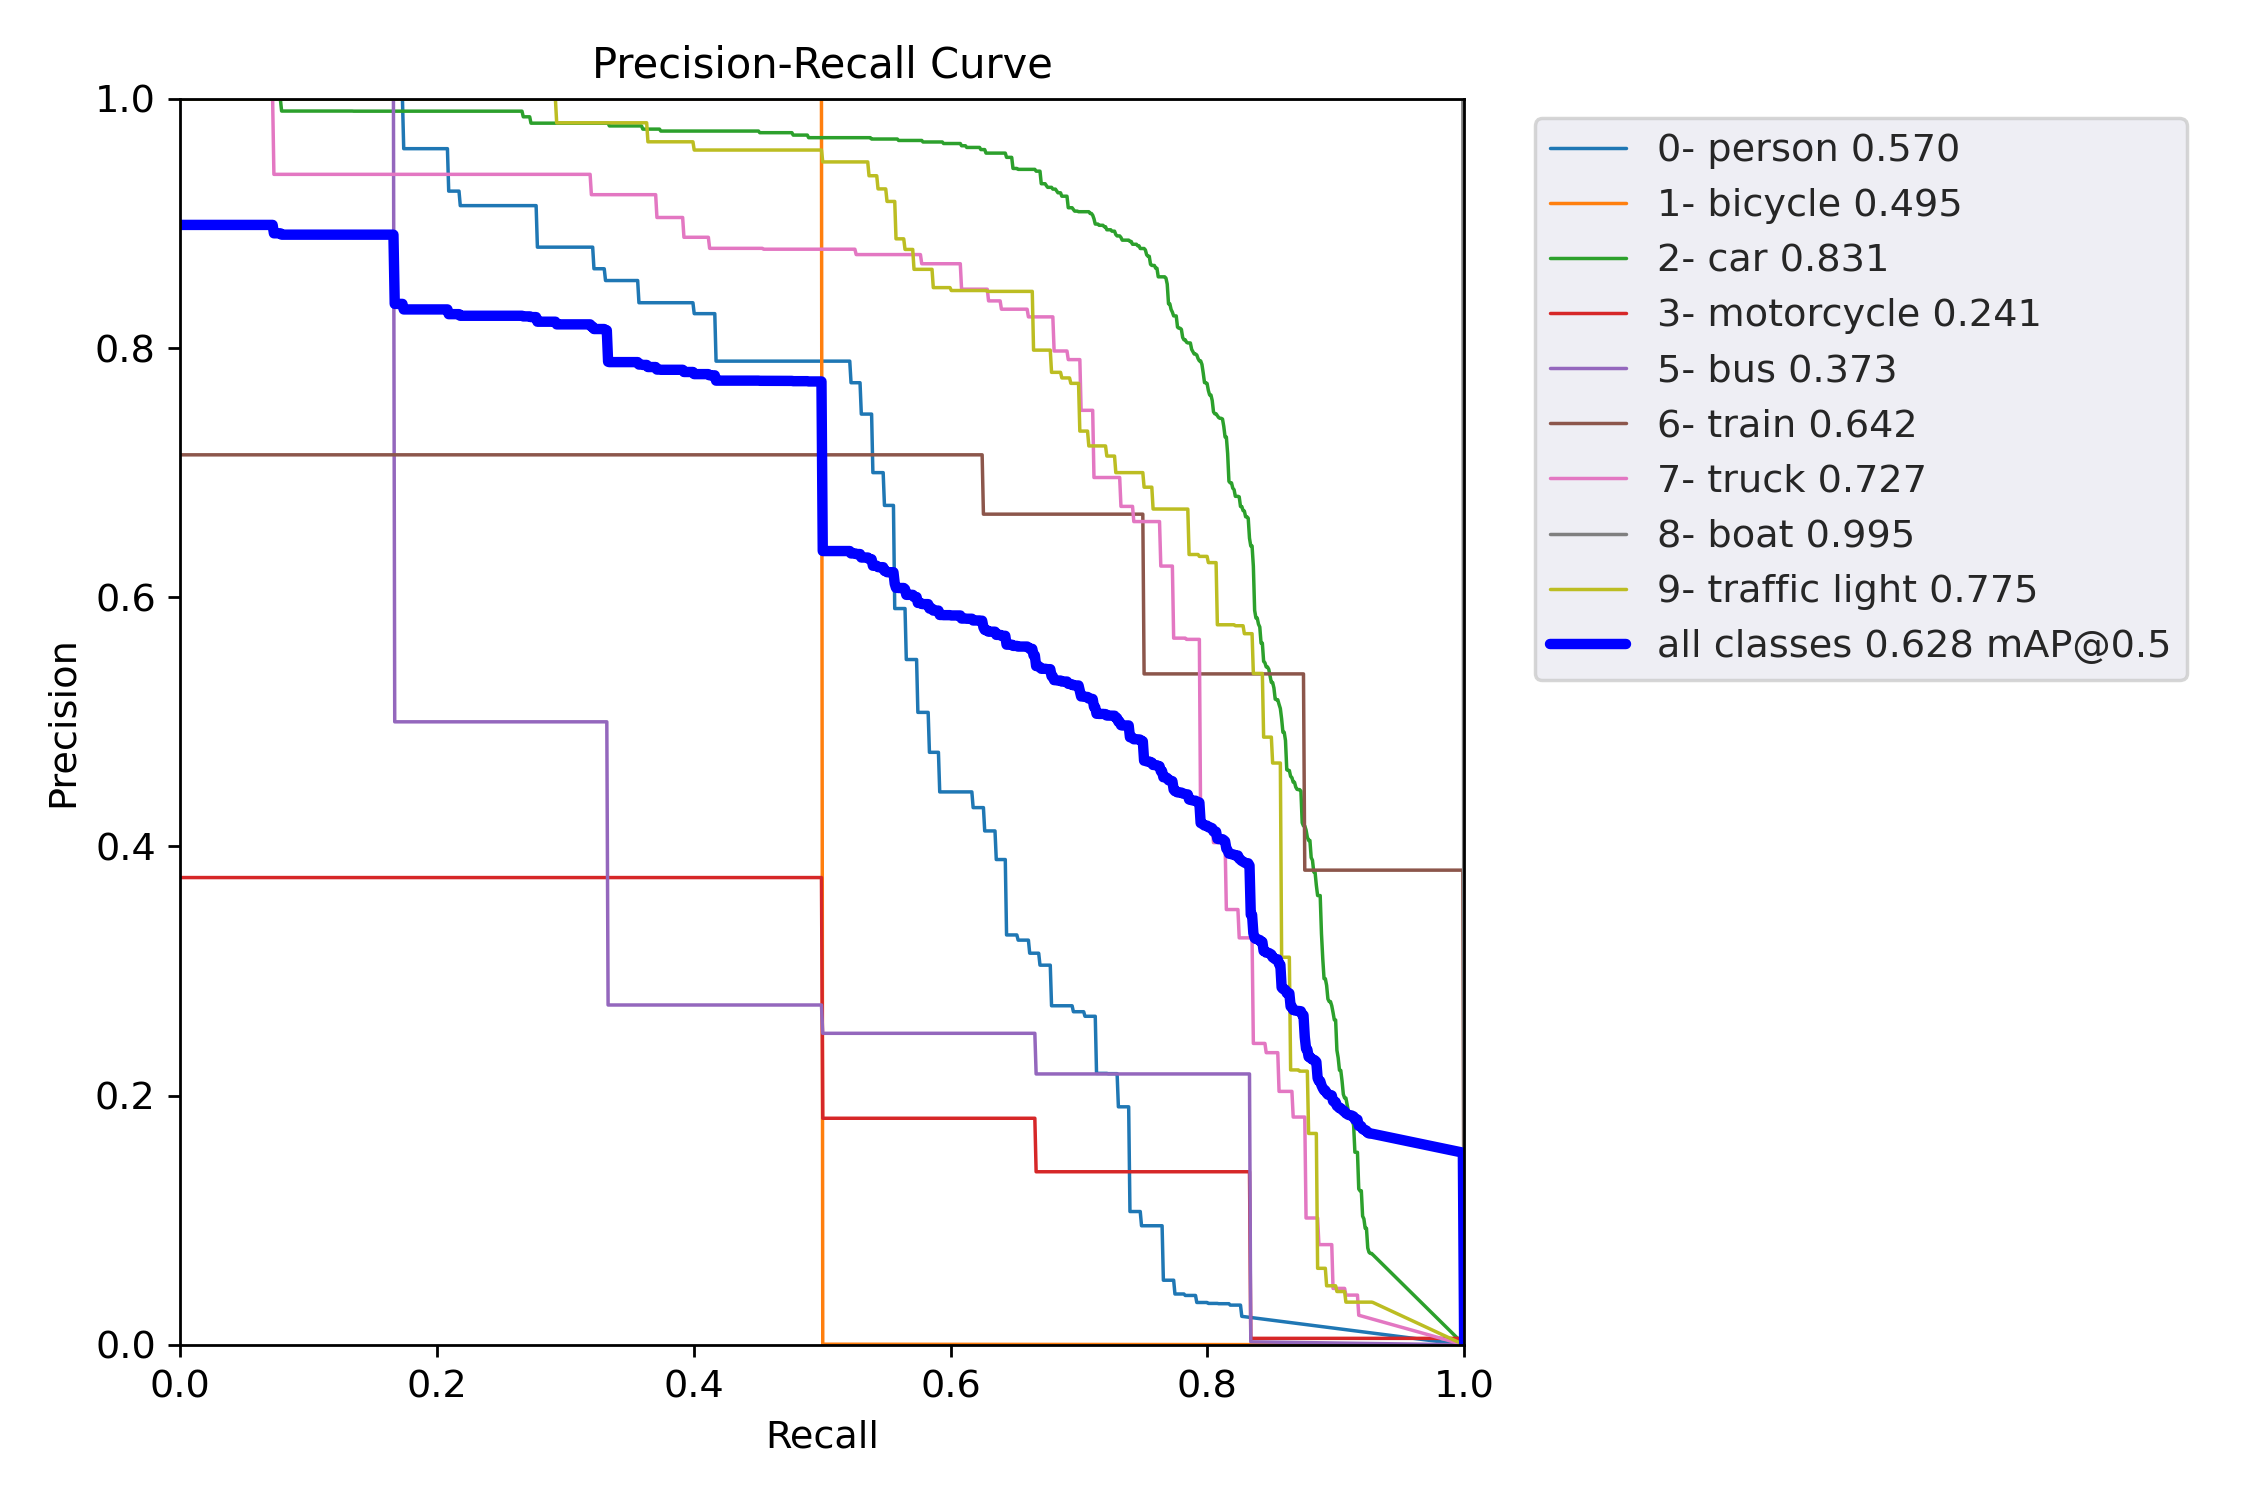

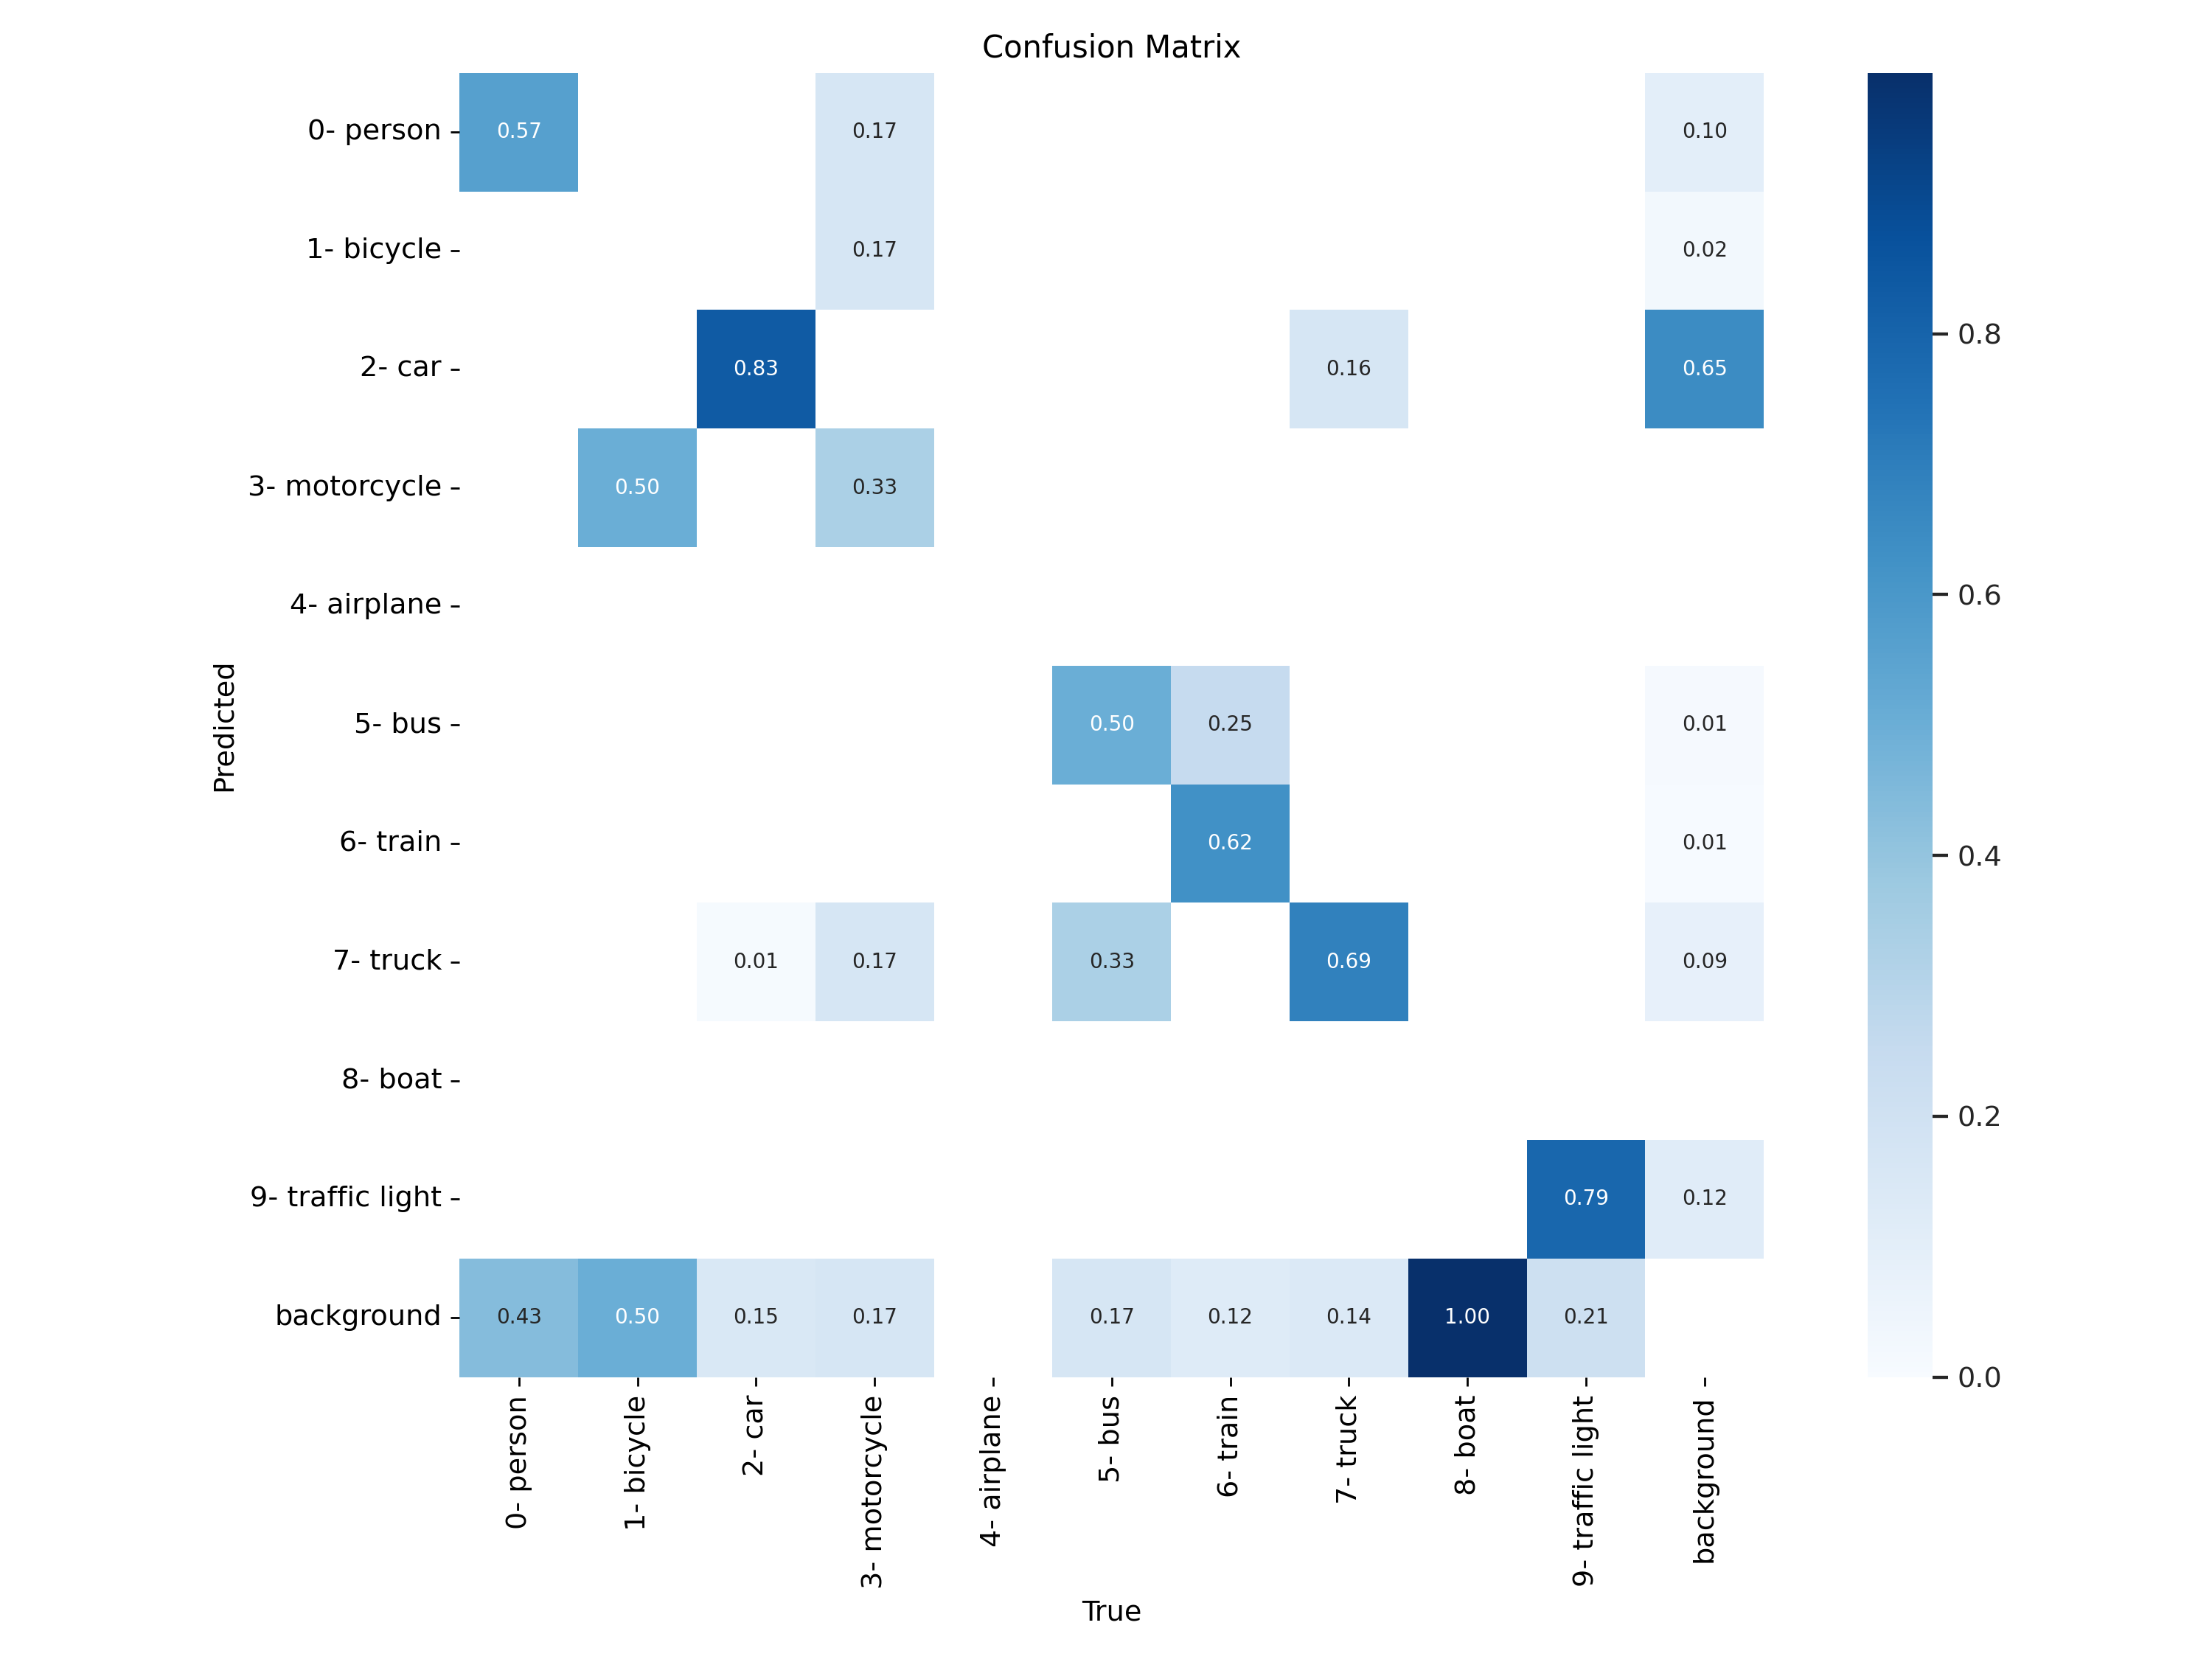

In [10]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp/F1_curve.png')
y = Image(filename='runs/train/exp/PR_curve.png')
z = Image(filename='runs/train/exp/confusion_matrix.png')
display(x, y,z)

**Yolo v4**

In [11]:
!wandb disabled
!python train.py --img 415 --batch 16 --epochs 50 --data /content/drive/MyDrive/4/data/data.yaml --weights '' --cfg /content/drive/MyDrive/4/yolov4.yaml --cache --workers 2

/bin/bash: line 1: wandb: command not found
2023-12-26 19:42:06.458526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 19:42:06.458579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 19:42:06.460028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=/content/drive/MyDrive/4/yolov4.yaml, data=/content/drive/MyDrive/4/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, d

In [4]:
p_yol5 = 0.799
r_yol5 = 0.187
mAP_yolo5 = 0.256

storeResults('YoloV4',p_yol5,r_yol5,mAP_yolo5)

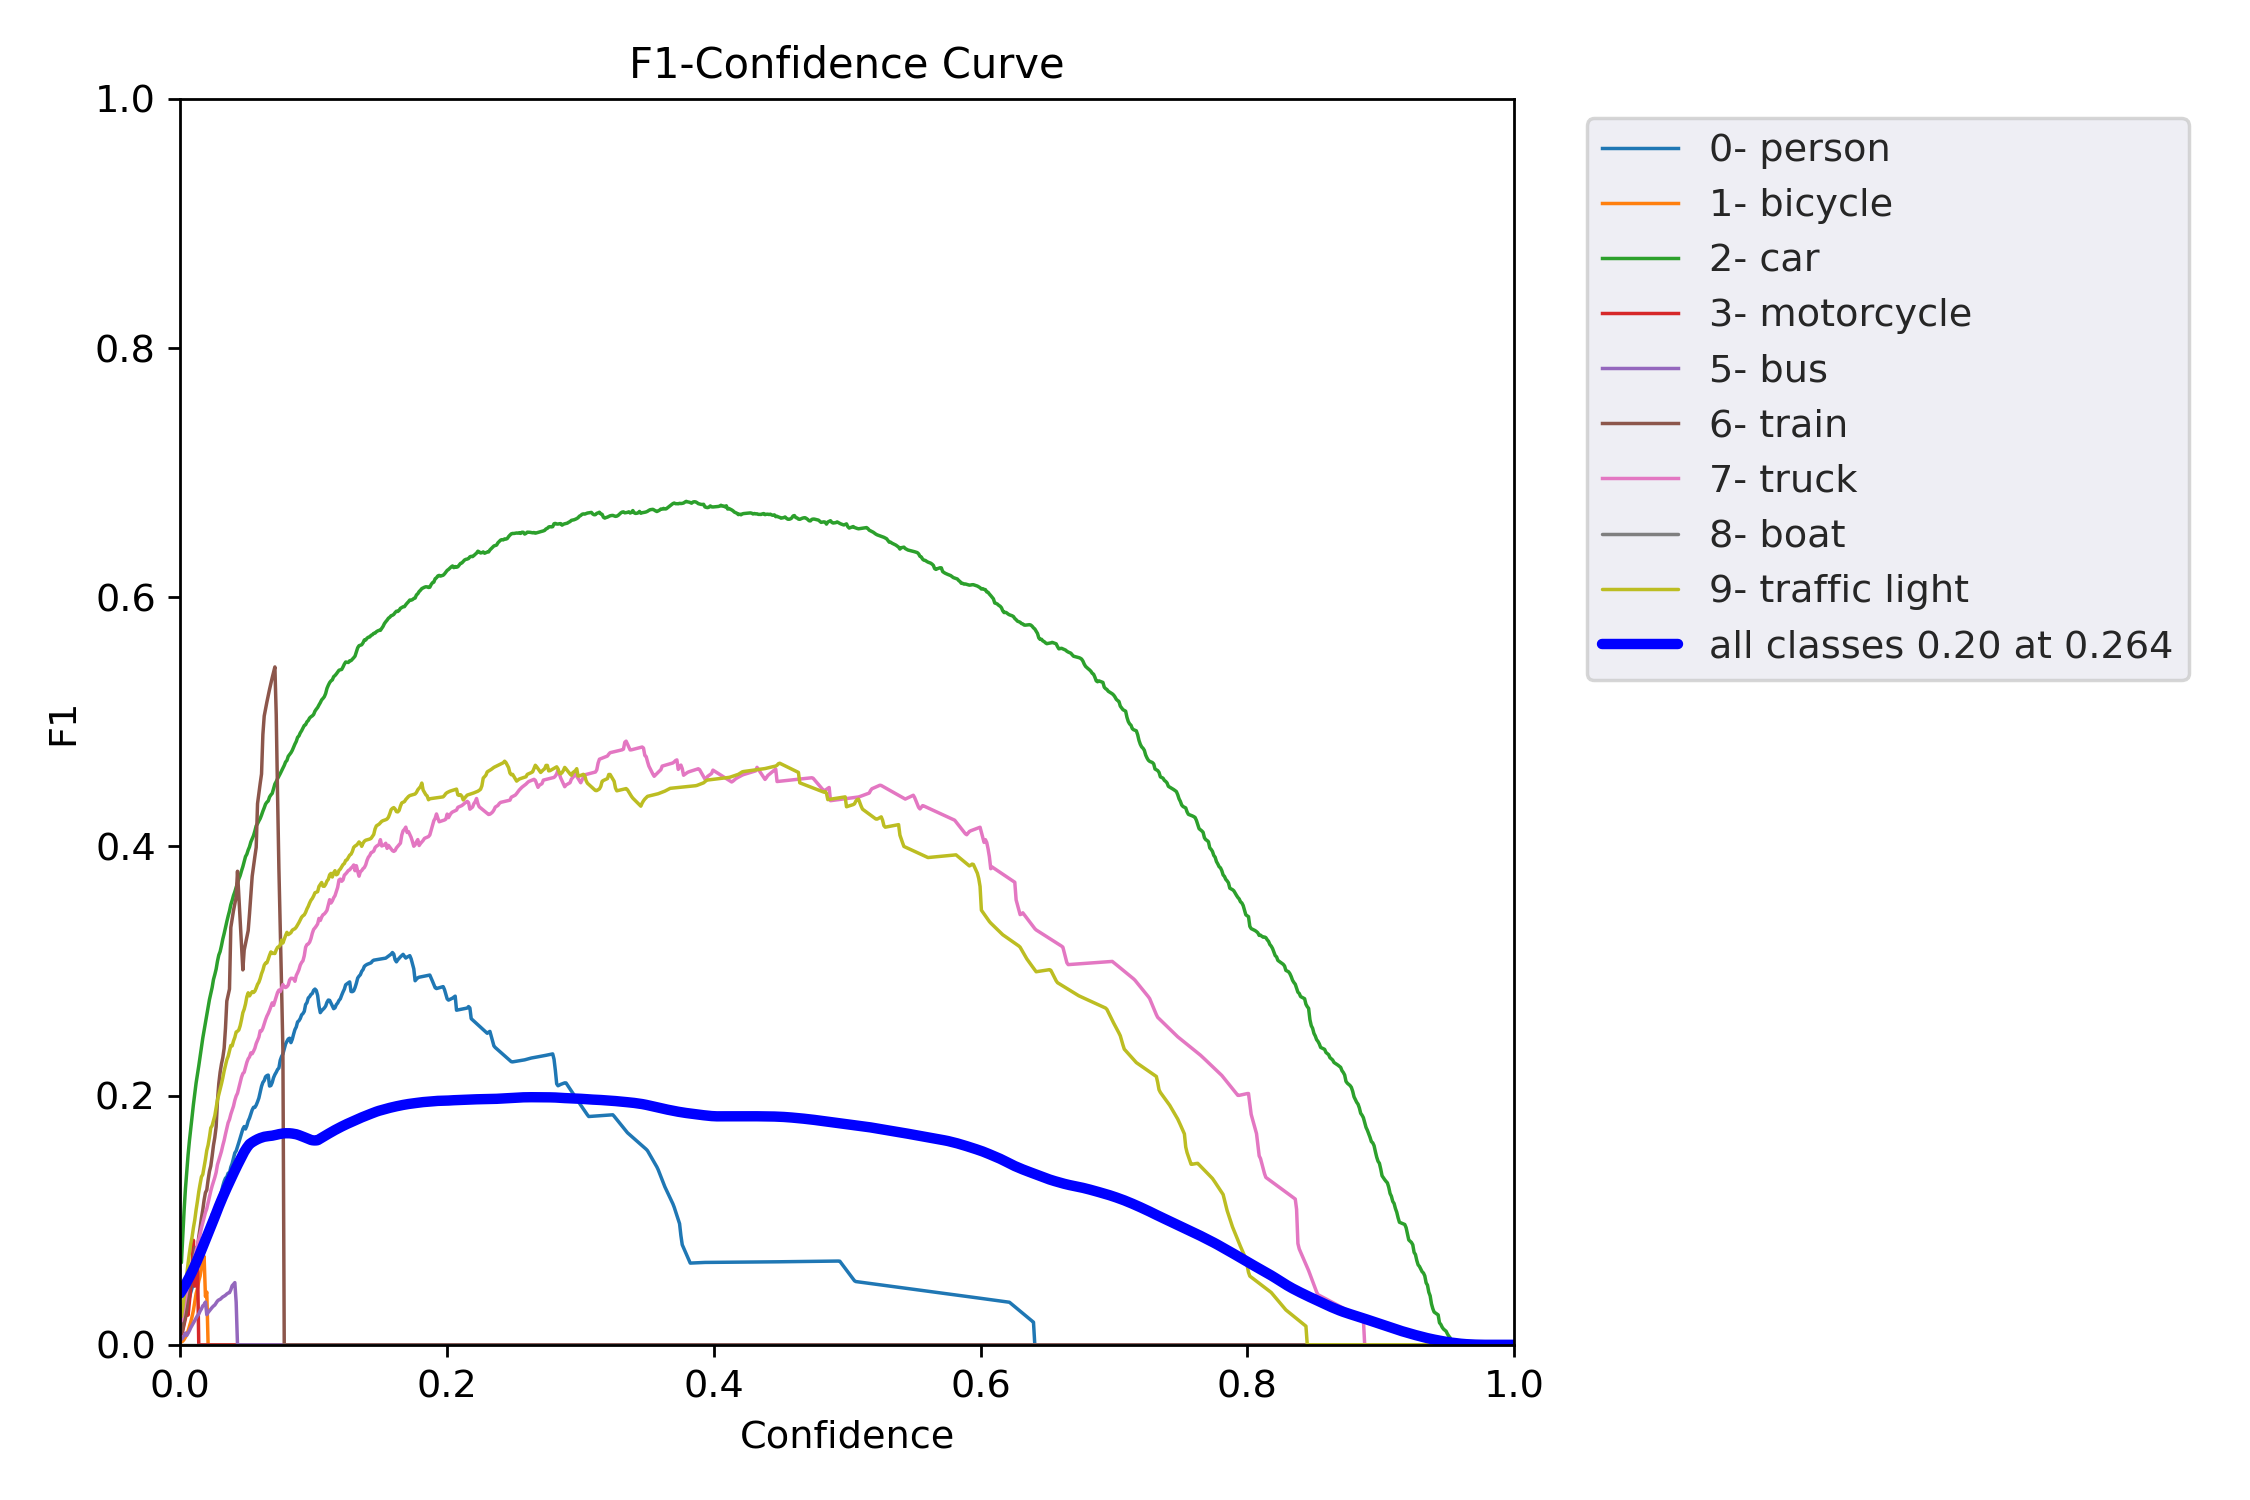

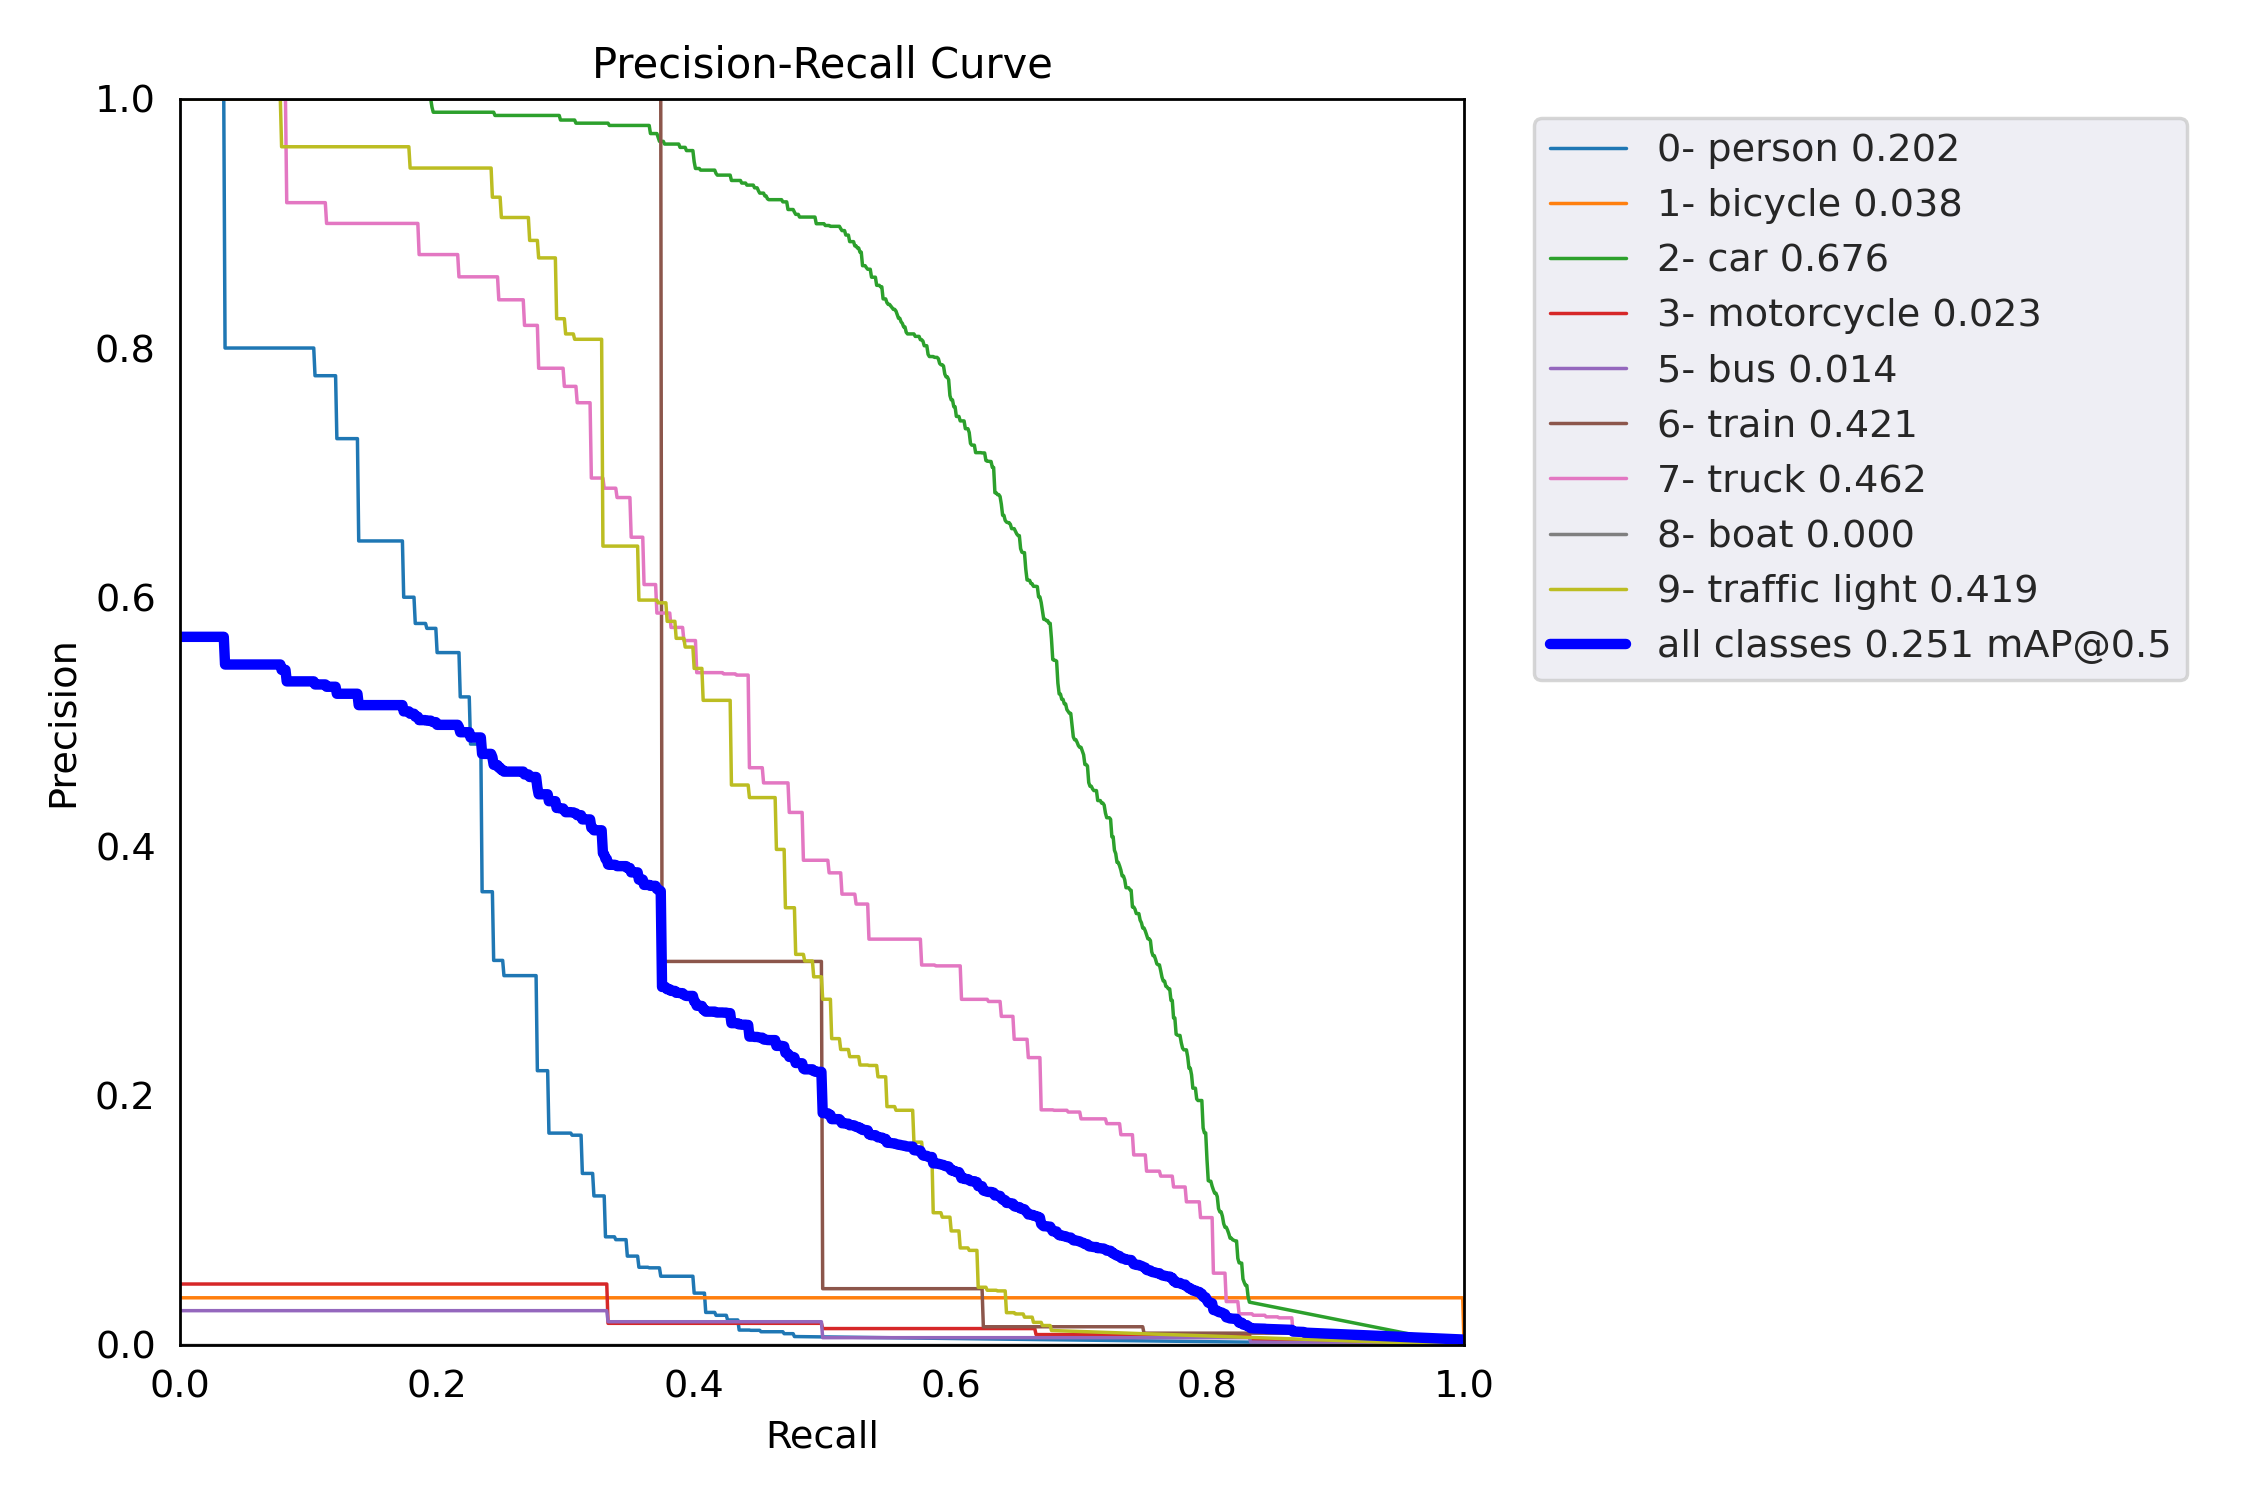

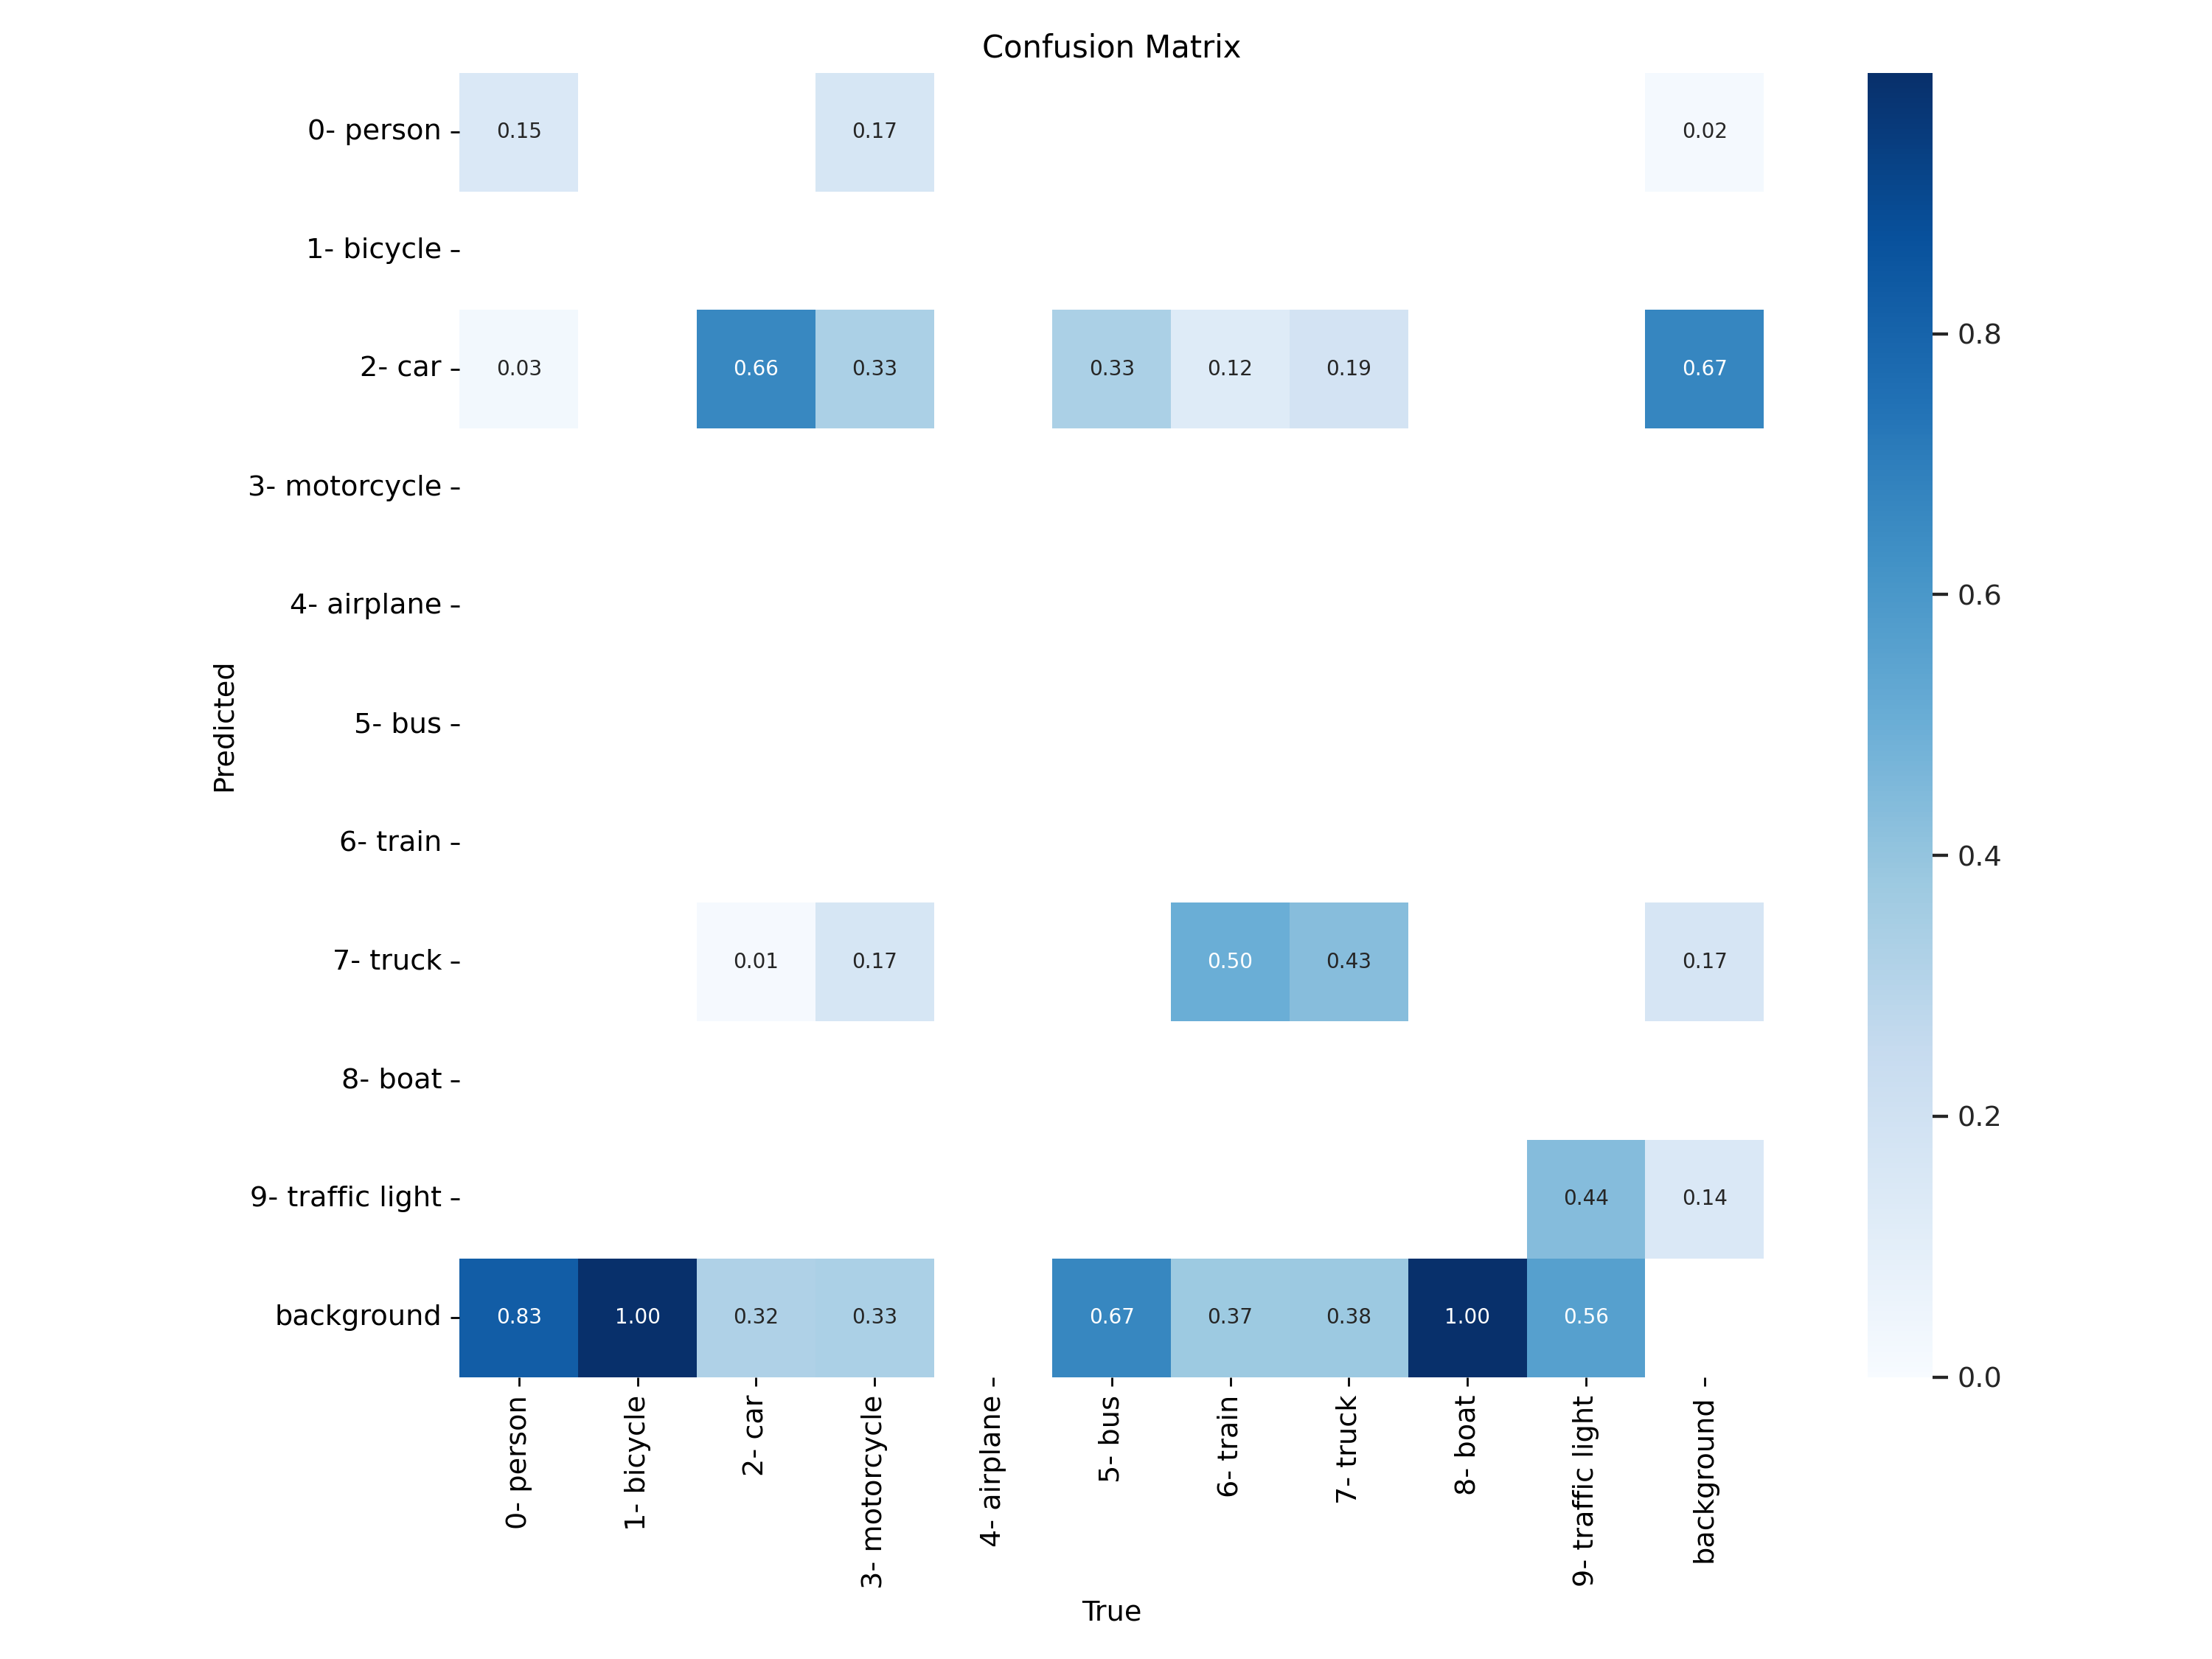

In [12]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp2/F1_curve.png')
y = Image(filename='runs/train/exp2/PR_curve.png')
z = Image(filename='runs/train/exp2/confusion_matrix.png')
display(x, y,z)

In [18]:
!zip -r /content/drive/MyDrive/4/file.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/tutorial.ipynb (deflated 74%)
  adding: content/yolov5/__pycache__/ (stored 0%)
  adding: content/yolov5/__pycache__/val.cpython-310.pyc (deflated 43%)
  adding: content/yolov5/requirements.txt (deflated 55%)
  adding: content/yolov5/export.py (deflated 72%)
  adding: content/yolov5/.gitignore (deflated 55%)
  adding: content/yolov5/utils/ (stored 0%)
  adding: content/yolov5/utils/metrics.py (deflated 66%)
  adding: content/yolov5/utils/loss.py (deflated 69%)
  adding: content/yolov5/utils/autobatch.py (deflated 56%)
  adding: content/yolov5/utils/__pycache__/ (stored 0%)
  adding: content/yolov5/utils/__pycache__/__init__.cpython-310.pyc (deflated 40%)
  adding: content/yolov5/utils/__pycache__/downloads.cpython-310.pyc (deflated 42%)
  adding: content/yolov5/utils/__pycache__/dataloaders.cpython-310.pyc (deflated 51%)
  adding: content/yolov5/utils/__pycache__/callbacks.cpython-310.pyc (deflated 51%)
  adding: content/yo

In [15]:
!git clone https://github.com/SunetK/MCD-YOLOv5-joint-DPC

Cloning into 'MCD-YOLOv5-joint-DPC'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 329 (delta 75), reused 82 (delta 20), pack-reused 147
Receiving objects: 100% (329/329), 338.64 KiB | 2.29 MiB/s, done.
Resolving deltas: 100% (111/111), done.


**MC-DAYolo**

In [16]:
!wandb disabled
!python train.py --img 415 --batch 4 --epochs 50 --data /content/drive/MyDrive/4/data/data.yaml --weights '' --cfg /content/yolov5/MCD-YOLOv5-joint-DPC/MCD-YOLOv5/models/yolov5x.yaml --cache --workers 2

/bin/bash: line 1: wandb: command not found
2023-12-26 20:03:24.803182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 20:03:24.803236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 20:03:24.804723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=/content/yolov5/MCD-YOLOv5-joint-DPC/MCD-YOLOv5/models/yolov5x.yaml, data=/content/drive/MyDrive/4/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=4, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cac

In [5]:
p_yol5 = 0.812
r_yol5 = 0.124
mAP_yolo5 = 0.158

storeResults('MC-DAYolo',p_yol5,r_yol5,mAP_yolo5)

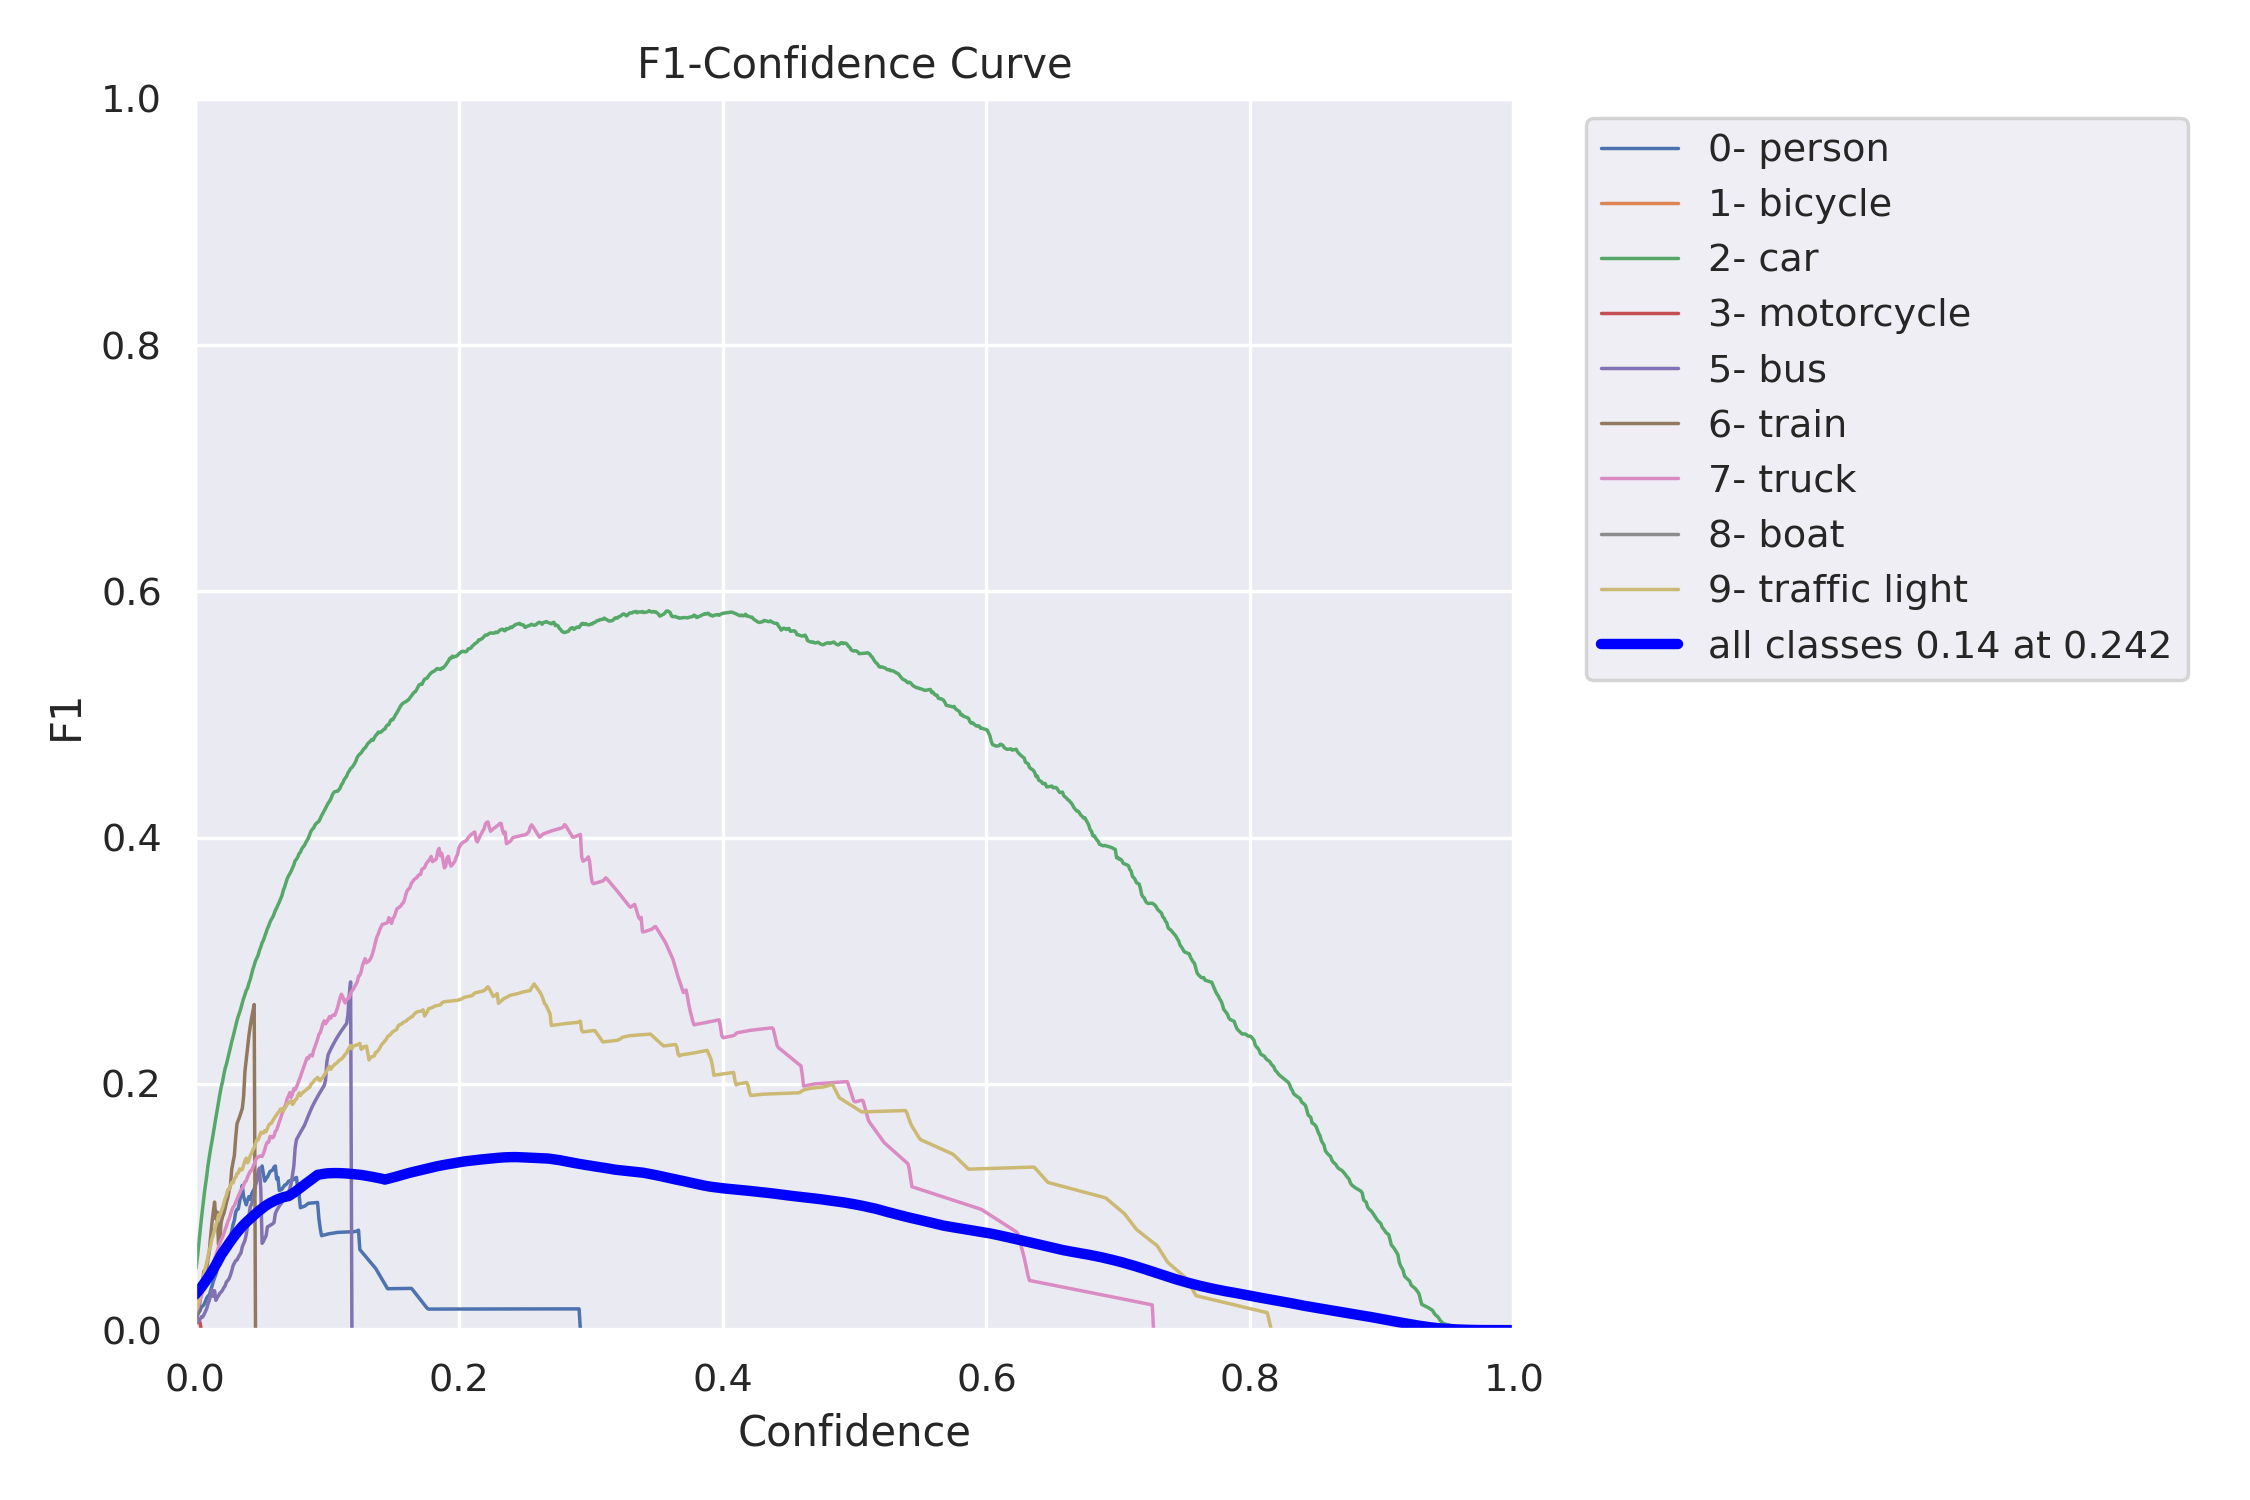

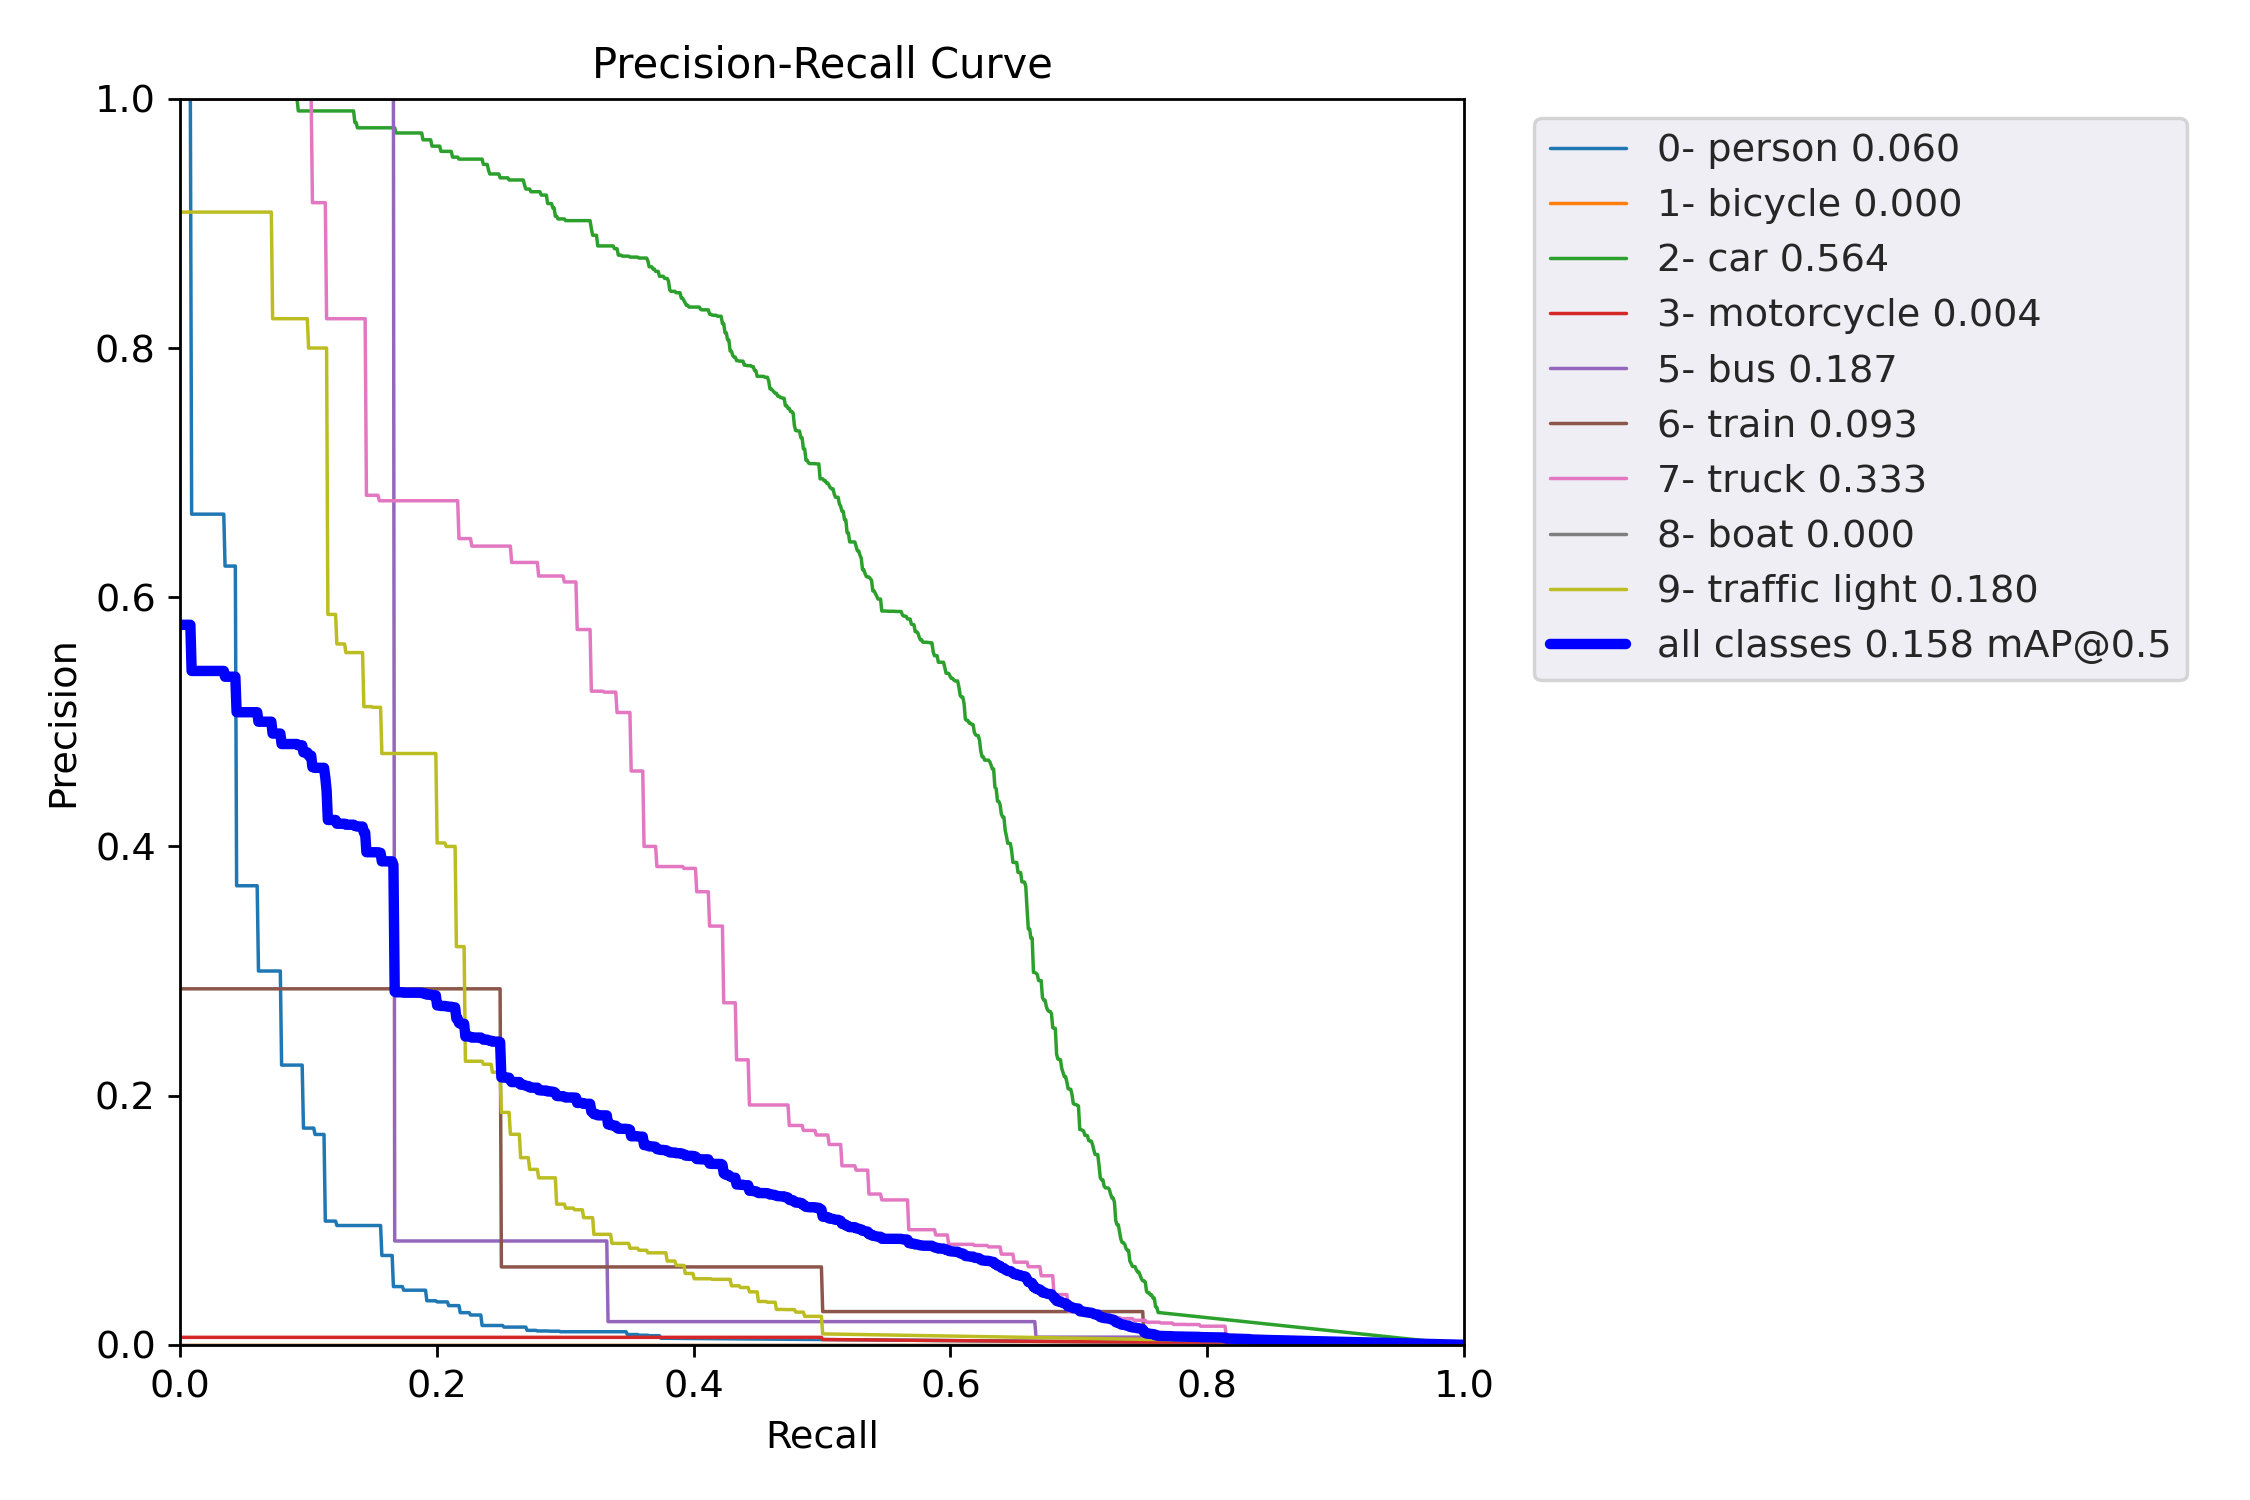

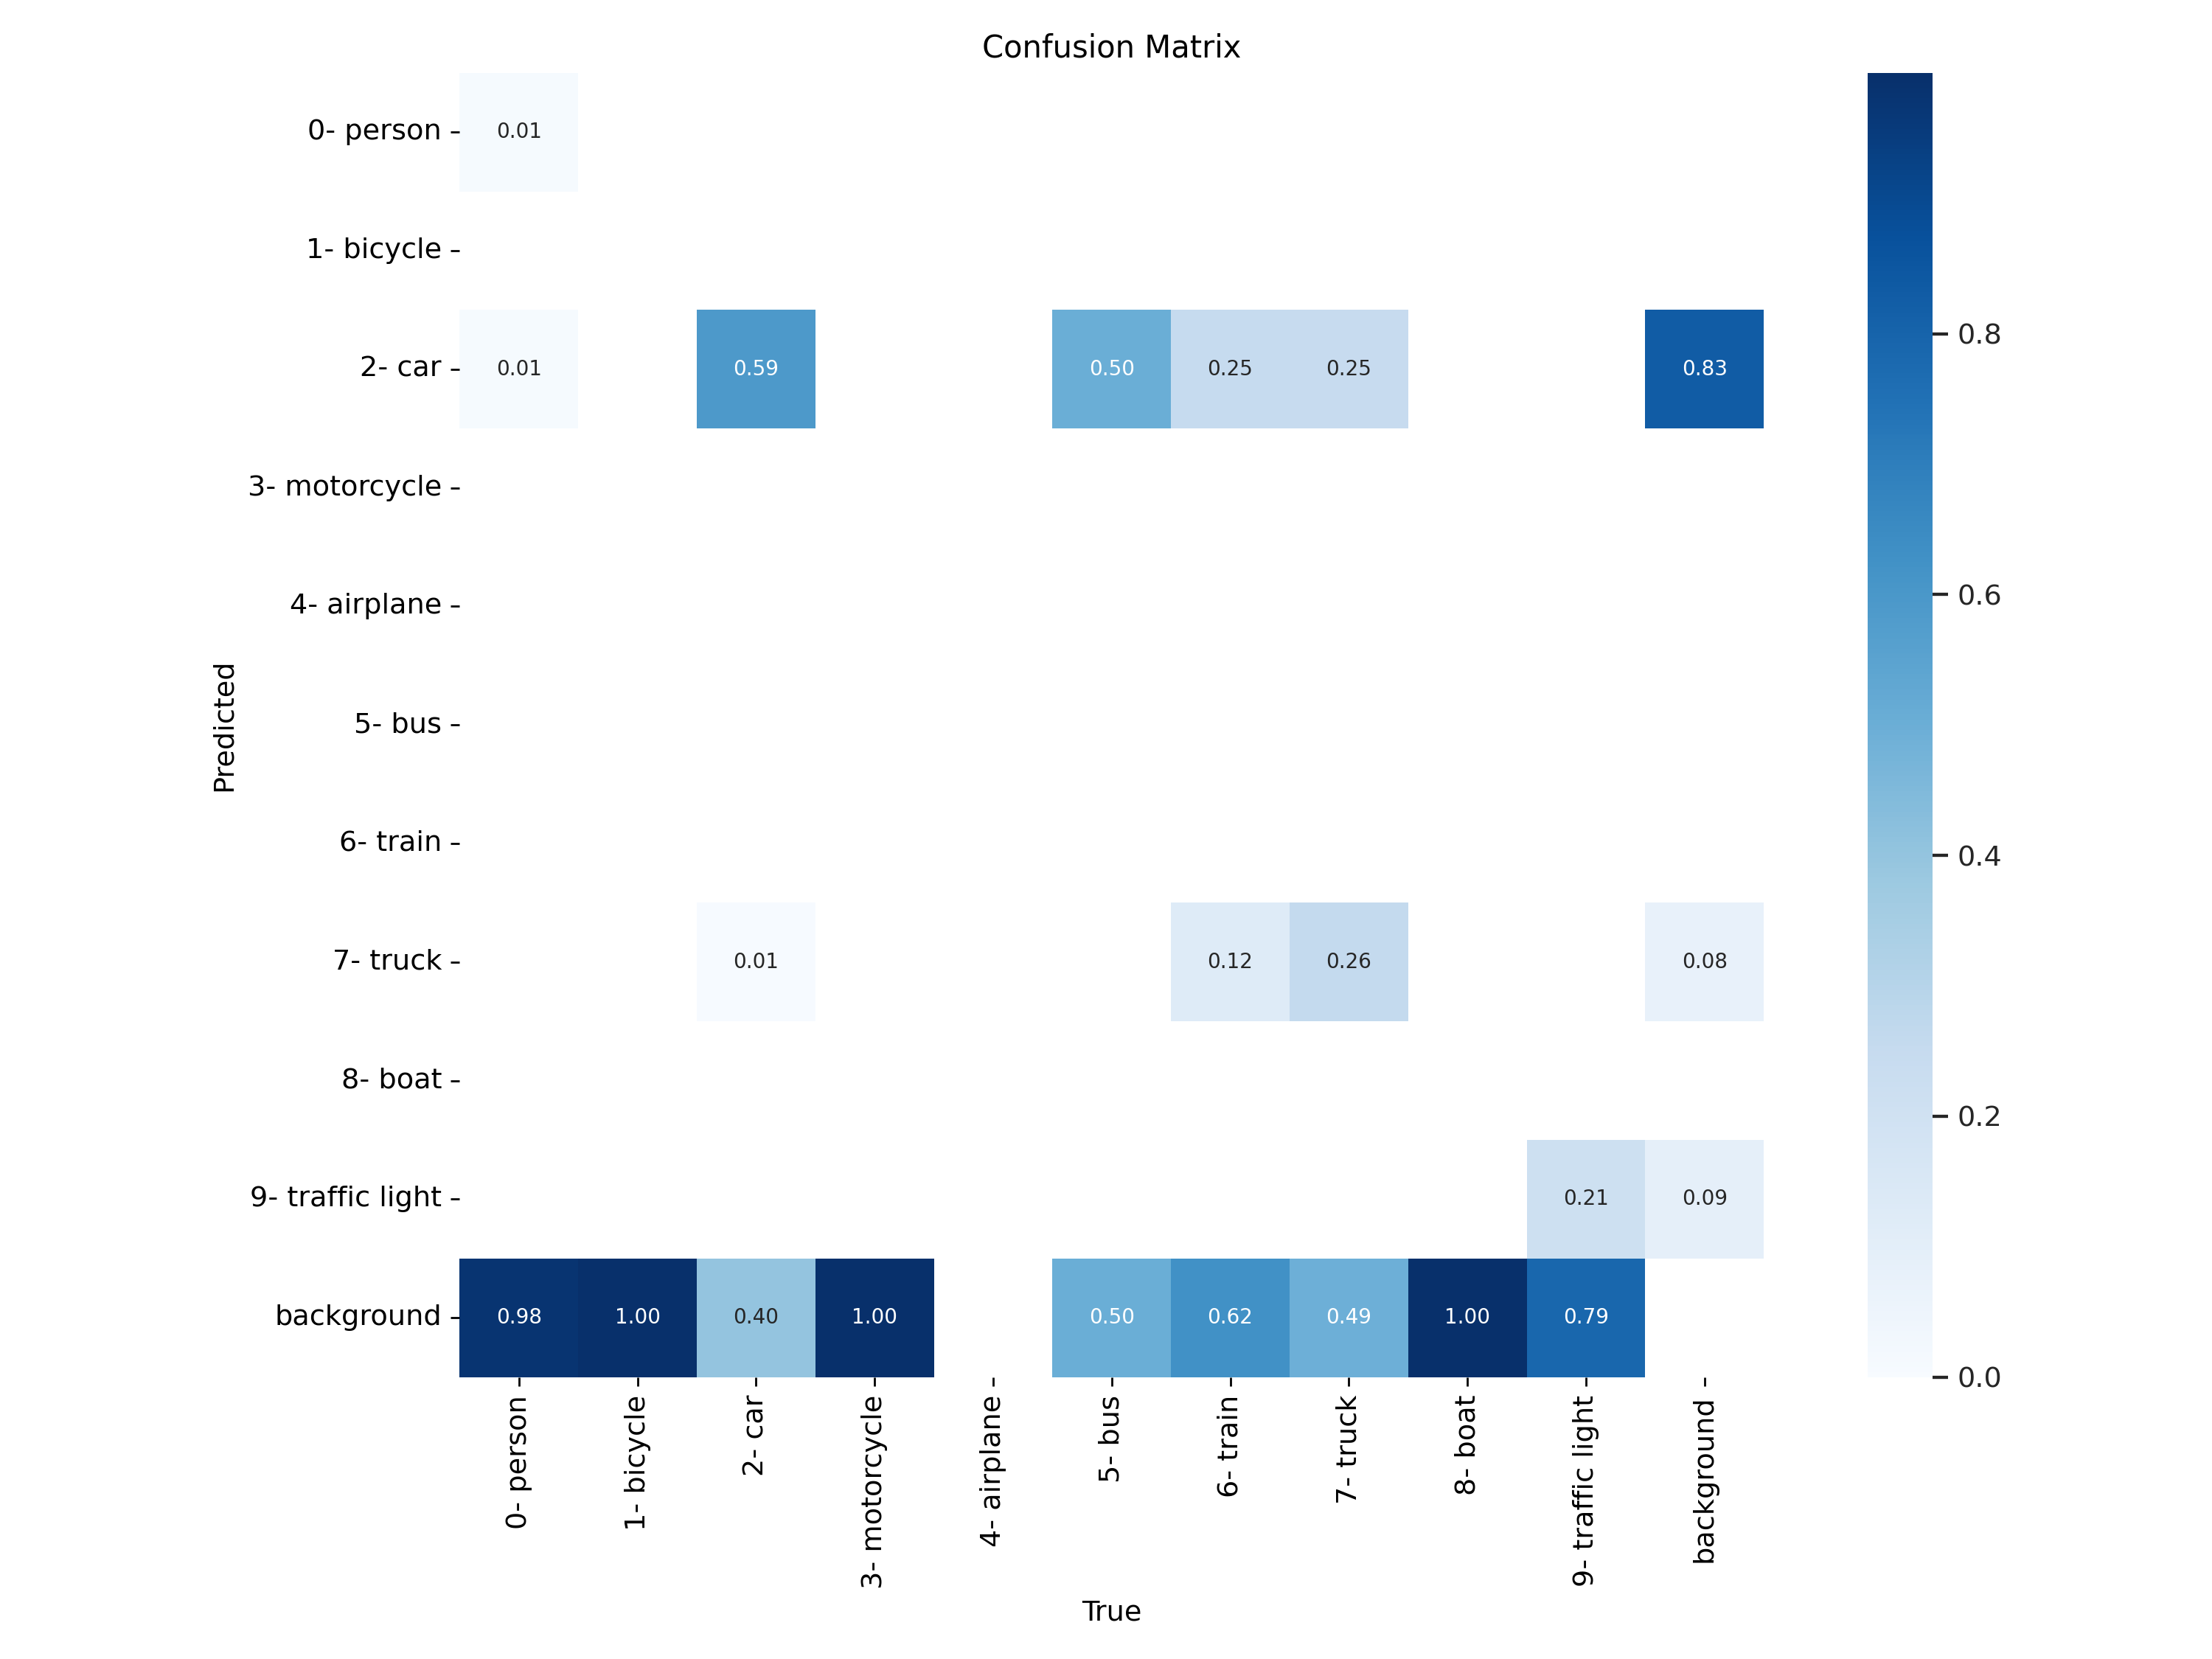

In [17]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp3/F1_curve.png')
y = Image(filename='runs/train/exp3/PR_curve.png')
z = Image(filename='runs/train/exp3/confusion_matrix.png')
display(x, y,z)

**YoloV8**

In [2]:
%cd /content

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.0 MB/s eta 0:00:00


In [4]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/drive/MyDrive/4/data/test/images/GOPR0475_frame_000300_rgb_anon_png.rf.bfa6bd4a07fa77a7f8112d6236838651.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/drive/MyDrive/4/data/valid/images/GOPR0475_frame_000148_rgb_anon_png.rf.5988210879733a56caea5a33b79c9259.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 1280, 1280
shape of the validation image 1280, 1280


In [5]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/4/data/data.yaml", epochs=50, imgsz=415)  # train the model

100%|██████████| 49.7M/49.7M [00:00<00:00, 219MB/s]


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/4/data/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=415, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 86.3MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅
WARNING ⚠️ imgsz=[415] must be multiple of max stride 32, updating to [416]


train: Scanning /content/drive/MyDrive/4/data/train/labels... 639 images, 0 backgrounds, 0 corrupt: 100%|██████████| 639/639 [00:33<00:00, 18.89it/s]


train: New cache created: /content/drive/MyDrive/4/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/4/data/valid/labels... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:09<00:00, 19.46it/s]


val: New cache created: /content/drive/MyDrive/4/data/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.17G      1.384      1.644       1.02        130        416: 100%|██████████| 40/40 [00:13<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        180       1126      0.637      0.301       0.32      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.32G       1.32      1.233      1.006        103        416: 100%|██████████| 40/40 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]


                   all        180       1126      0.532      0.379      0.314      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.35G      1.389      1.285      1.033        105        416: 100%|██████████| 40/40 [00:08<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]


                   all        180       1126      0.426      0.299      0.304      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.36G       1.39      1.238      1.042        156        416: 100%|██████████| 40/40 [00:08<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]


                   all        180       1126      0.325       0.31      0.265      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.37G        1.4      1.178      1.036        113        416: 100%|██████████| 40/40 [00:08<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]


                   all        180       1126      0.524      0.268      0.296      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.34G      1.388      1.083      1.029        110        416: 100%|██████████| 40/40 [00:09<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]


                   all        180       1126      0.359      0.269      0.294      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.37G      1.403      1.073      1.043        109        416: 100%|██████████| 40/40 [00:09<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]


                   all        180       1126      0.493      0.264      0.323      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.34G      1.357      1.073      1.021         64        416: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]


                   all        180       1126      0.311      0.348      0.321      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.34G      1.341      1.055      1.031        102        416: 100%|██████████| 40/40 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]


                   all        180       1126       0.44      0.246       0.29      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.33G      1.328     0.9945      1.003        134        416: 100%|██████████| 40/40 [00:09<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all        180       1126      0.446       0.31       0.32      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.34G      1.305     0.9487      1.003        118        416: 100%|██████████| 40/40 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]


                   all        180       1126      0.462       0.42      0.389      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.36G      1.311     0.9724      1.002         91        416: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]


                   all        180       1126      0.448      0.452      0.397      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.36G      1.271     0.9184     0.9819        121        416: 100%|██████████| 40/40 [00:09<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]


                   all        180       1126      0.527      0.419      0.465       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.33G      1.234     0.8933     0.9817        154        416: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]


                   all        180       1126      0.531      0.475       0.46      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.37G      1.216     0.8483     0.9697        117        416: 100%|██████████| 40/40 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]


                   all        180       1126      0.587      0.461      0.442      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.34G      1.224     0.8664     0.9871        135        416: 100%|██████████| 40/40 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]


                   all        180       1126      0.403      0.415      0.423       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.36G      1.208     0.8341     0.9576        110        416: 100%|██████████| 40/40 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]


                   all        180       1126      0.438      0.475      0.415      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.35G      1.184     0.8295     0.9535         75        416: 100%|██████████| 40/40 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]


                   all        180       1126      0.475      0.468      0.436      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.34G      1.184     0.8278     0.9639         89        416: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]


                   all        180       1126      0.484      0.496      0.466      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.36G      1.167     0.7979     0.9553        104        416: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]


                   all        180       1126      0.508      0.471      0.453      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.36G      1.181     0.8114     0.9519        104        416: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

                   all        180       1126      0.532      0.487       0.53       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.36G      1.174     0.8005     0.9545        186        416: 100%|██████████| 40/40 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]


                   all        180       1126      0.464      0.411       0.45      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.34G      1.182     0.7875     0.9553        152        416: 100%|██████████| 40/40 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]


                   all        180       1126      0.461      0.417      0.456      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.33G      1.103     0.7386     0.9393        148        416: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]


                   all        180       1126      0.481      0.385      0.446      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.35G      1.121     0.7596     0.9369         91        416: 100%|██████████| 40/40 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]


                   all        180       1126      0.533      0.466      0.503      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.34G      1.108     0.7348     0.9281         62        416: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]


                   all        180       1126      0.511      0.566      0.588      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.37G      1.097     0.7277     0.9303        116        416: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]


                   all        180       1126       0.59      0.499      0.554      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.35G       1.09     0.7071      0.932        112        416: 100%|██████████| 40/40 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]


                   all        180       1126      0.588      0.537      0.549      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.34G      1.094     0.6918     0.9337        114        416: 100%|██████████| 40/40 [00:09<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]


                   all        180       1126      0.528      0.498      0.493      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.35G      1.108     0.7076     0.9316        115        416: 100%|██████████| 40/40 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all        180       1126      0.528      0.468      0.536      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.36G      1.074     0.6798     0.9203        117        416: 100%|██████████| 40/40 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

                   all        180       1126      0.593      0.506      0.579      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.37G      1.062     0.6579     0.9166        151        416: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]


                   all        180       1126      0.682      0.449       0.57      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.37G      1.049     0.6574     0.9134         89        416: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]


                   all        180       1126       0.56      0.522      0.574       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.35G      1.065     0.6613      0.922         97        416: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]


                   all        180       1126      0.487      0.534      0.545      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.36G      1.037     0.6435     0.9125        164        416: 100%|██████████| 40/40 [00:09<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all        180       1126      0.574      0.493      0.525      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.36G       1.04      0.641     0.9114        131        416: 100%|██████████| 40/40 [00:09<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]


                   all        180       1126      0.615      0.512      0.541       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.37G      1.021     0.6218     0.9095        126        416: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        180       1126      0.695      0.482      0.578      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.37G      1.002     0.6146        0.9        115        416: 100%|██████████| 40/40 [00:09<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

                   all        180       1126      0.622      0.513      0.567      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.34G     0.9986     0.6141     0.8971        103        416: 100%|██████████| 40/40 [00:09<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]


                   all        180       1126       0.55      0.507      0.539      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.34G      0.997     0.6052     0.9093        122        416: 100%|██████████| 40/40 [00:09<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]


                   all        180       1126      0.583      0.505       0.57      0.366
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.33G     0.9937     0.5659     0.8935        111        416: 100%|██████████| 40/40 [00:11<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all        180       1126      0.541      0.551      0.598      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.34G     0.9733     0.5443     0.8906         83        416: 100%|██████████| 40/40 [00:09<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]


                   all        180       1126      0.655      0.527      0.612      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.35G     0.9862     0.5569     0.8828         86        416: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]


                   all        180       1126      0.569      0.534      0.573      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.34G     0.9775     0.5506     0.8855         77        416: 100%|██████████| 40/40 [00:09<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all        180       1126      0.607      0.576      0.606      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.35G     0.9582      0.534     0.8875         97        416: 100%|██████████| 40/40 [00:09<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all        180       1126      0.662      0.513      0.607      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.35G     0.9505     0.5276     0.8851         73        416: 100%|██████████| 40/40 [00:09<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]

                   all        180       1126      0.647      0.555      0.618      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.34G     0.9427     0.5185     0.8801         93        416: 100%|██████████| 40/40 [00:09<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]


                   all        180       1126       0.61      0.591      0.625       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.33G     0.9376     0.5057     0.8809         97        416: 100%|██████████| 40/40 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]


                   all        180       1126       0.59      0.582      0.634      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.34G     0.9156     0.5019     0.8768         98        416: 100%|██████████| 40/40 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]


                   all        180       1126      0.615      0.586      0.637      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.35G     0.9174     0.4962     0.8708        128        416: 100%|██████████| 40/40 [00:09<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]


                   all        180       1126      0.608      0.581      0.638      0.399

50 epochs completed in 0.172 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]


                   all        180       1126      0.609      0.582      0.638      0.399
             0- person        180        115      0.797      0.391      0.545      0.296
            1- bicycle        180          2      0.186        0.5      0.578      0.339
                2- car        180        751      0.841      0.792      0.862      0.566
         3- motorcycle        180          6      0.616      0.667      0.681      0.354
                5- bus        180          6      0.586       0.71      0.709      0.497
              6- train        180          8      0.871      0.848      0.873       0.67
              7- truck        180         97      0.731       0.73      0.774      0.524
               8- boat        180          1          0          0          0          0
      9- traffic light        180        140      0.856      0.596      0.717       0.35
Speed: 0.1ms preprocess, 4.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect

In [6]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/4/data/valid/labels.cache... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]


                   all        180       1126      0.607       0.58      0.635      0.402
             0- person        180        115      0.797      0.391      0.543      0.295
            1- bicycle        180          2      0.187        0.5      0.578      0.339
                2- car        180        751       0.84      0.792      0.861      0.569
         3- motorcycle        180          6      0.617      0.667      0.681      0.354
                5- bus        180          6      0.585       0.71      0.709      0.517
              6- train        180          8      0.871      0.847      0.873       0.67
              7- truck        180         97      0.729       0.72      0.766      0.525
               8- boat        180          1          0          0          0          0
      9- traffic light        180        140      0.837      0.589      0.704      0.351
Speed: 0.1ms preprocess, 10.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detec

In [6]:
p_yol5 = 0.607
r_yol5 = 0.58
mAP_yolo5 = 0.635

storeResults('YoloV8',p_yol5,r_yol5,mAP_yolo5)

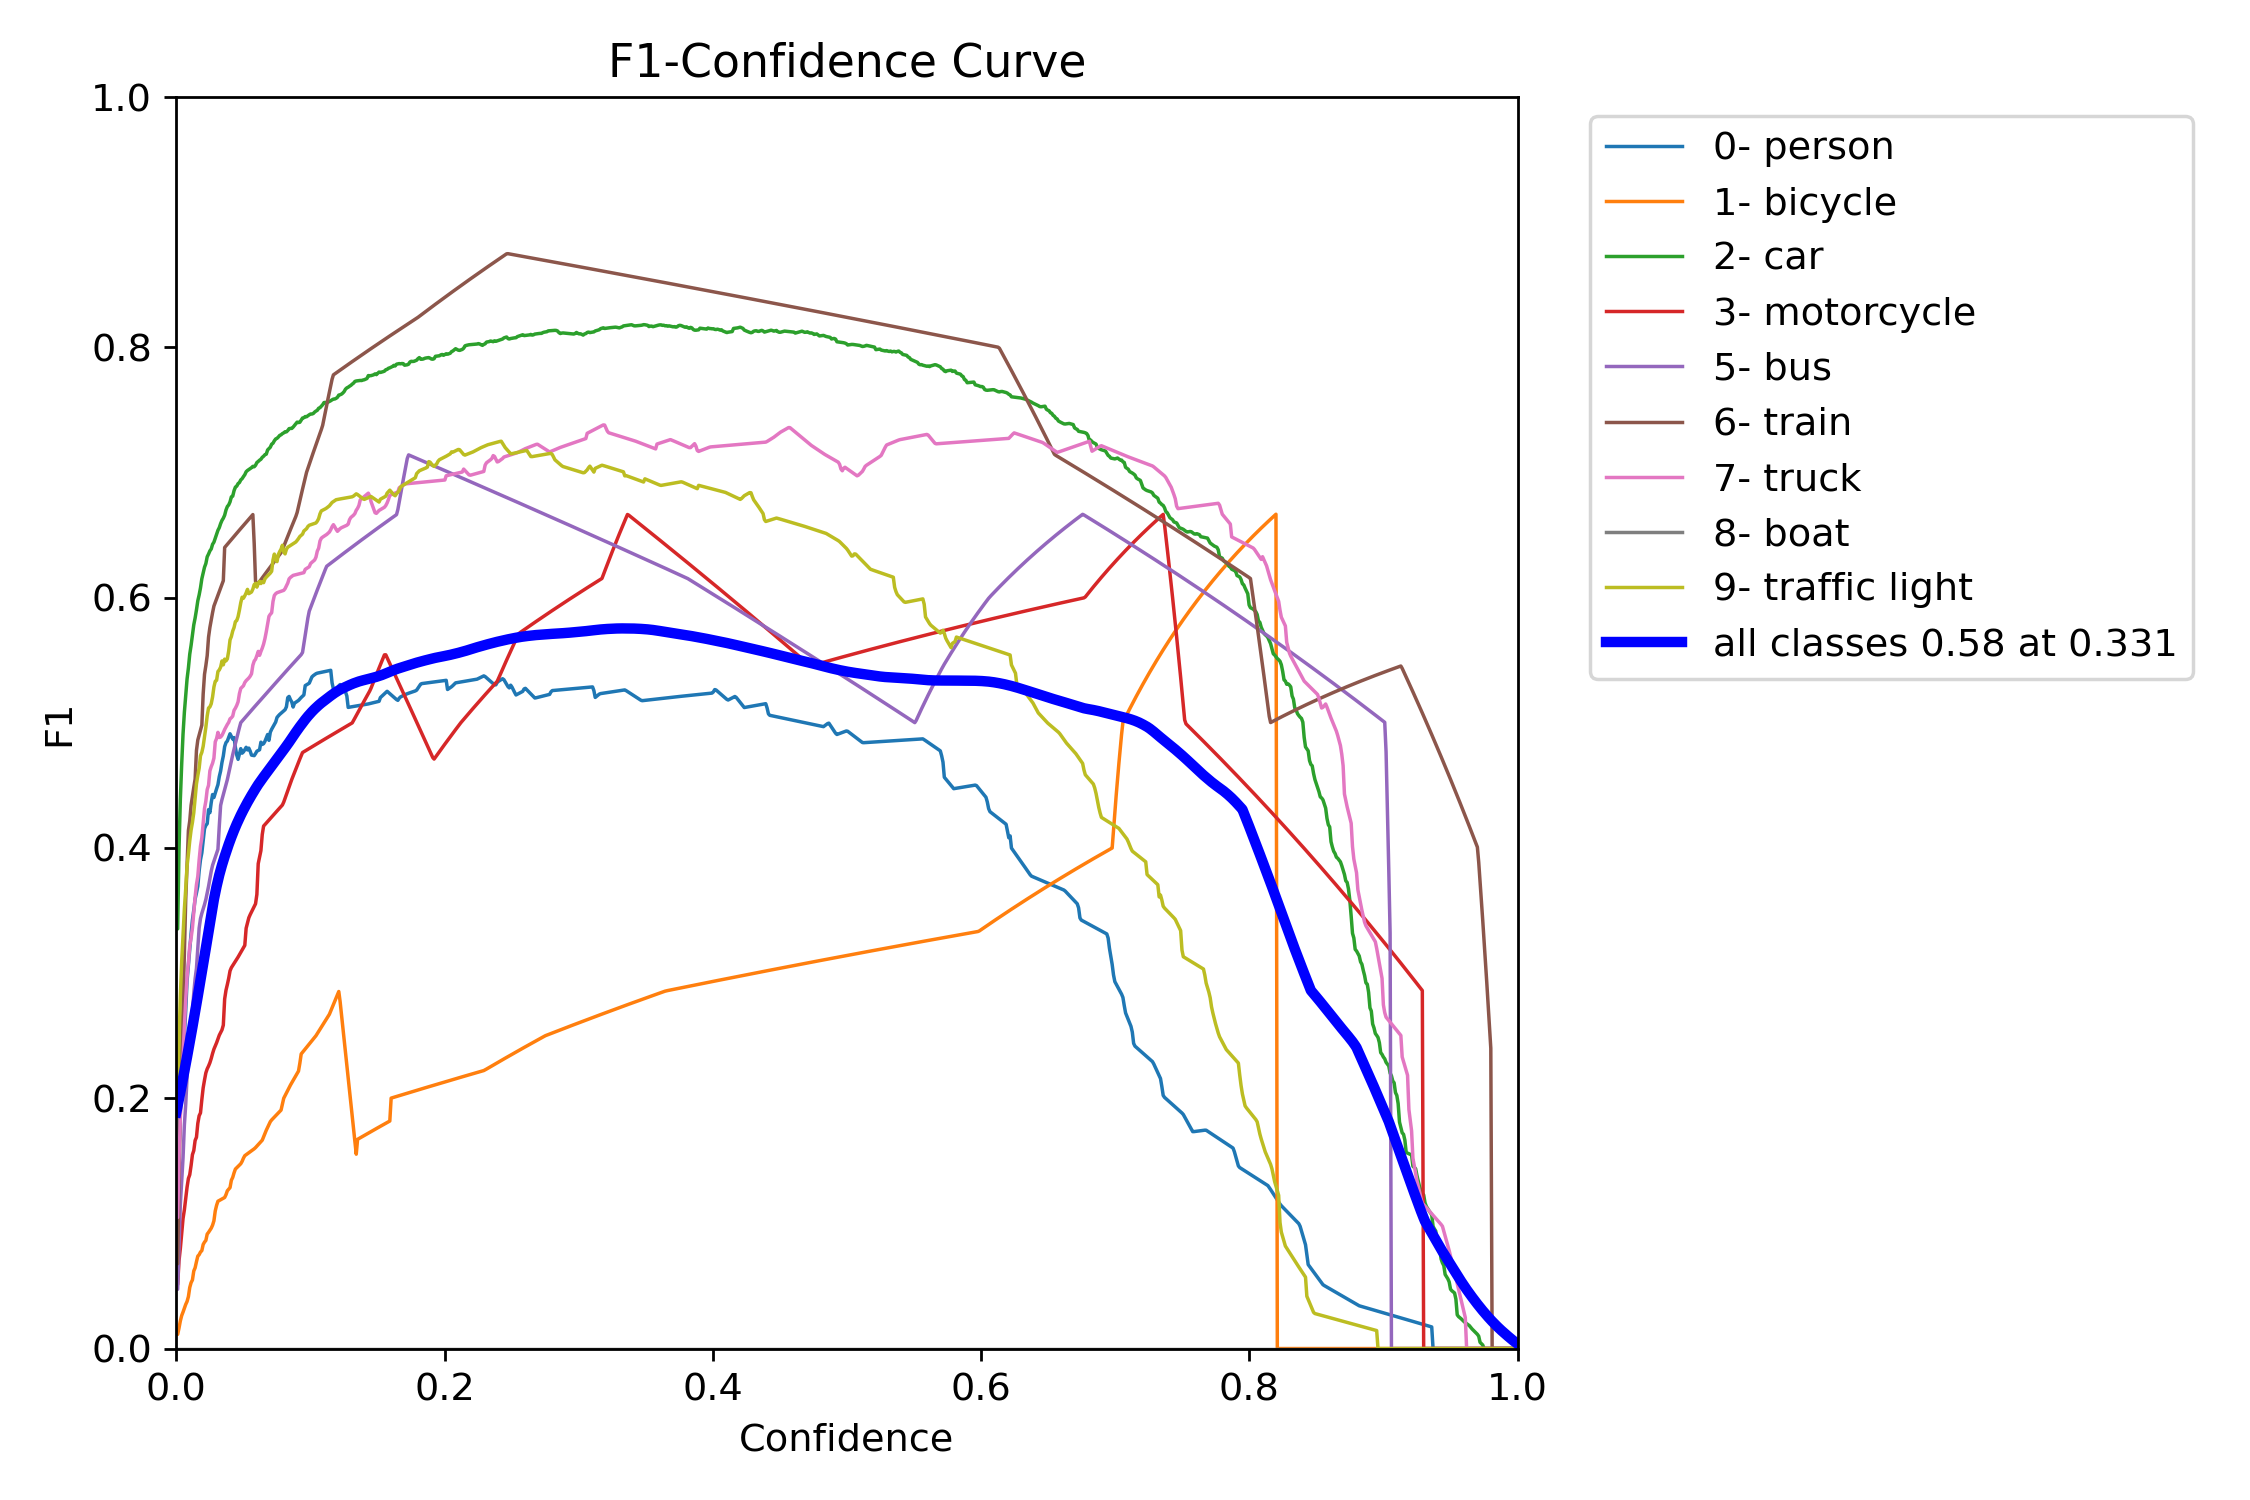

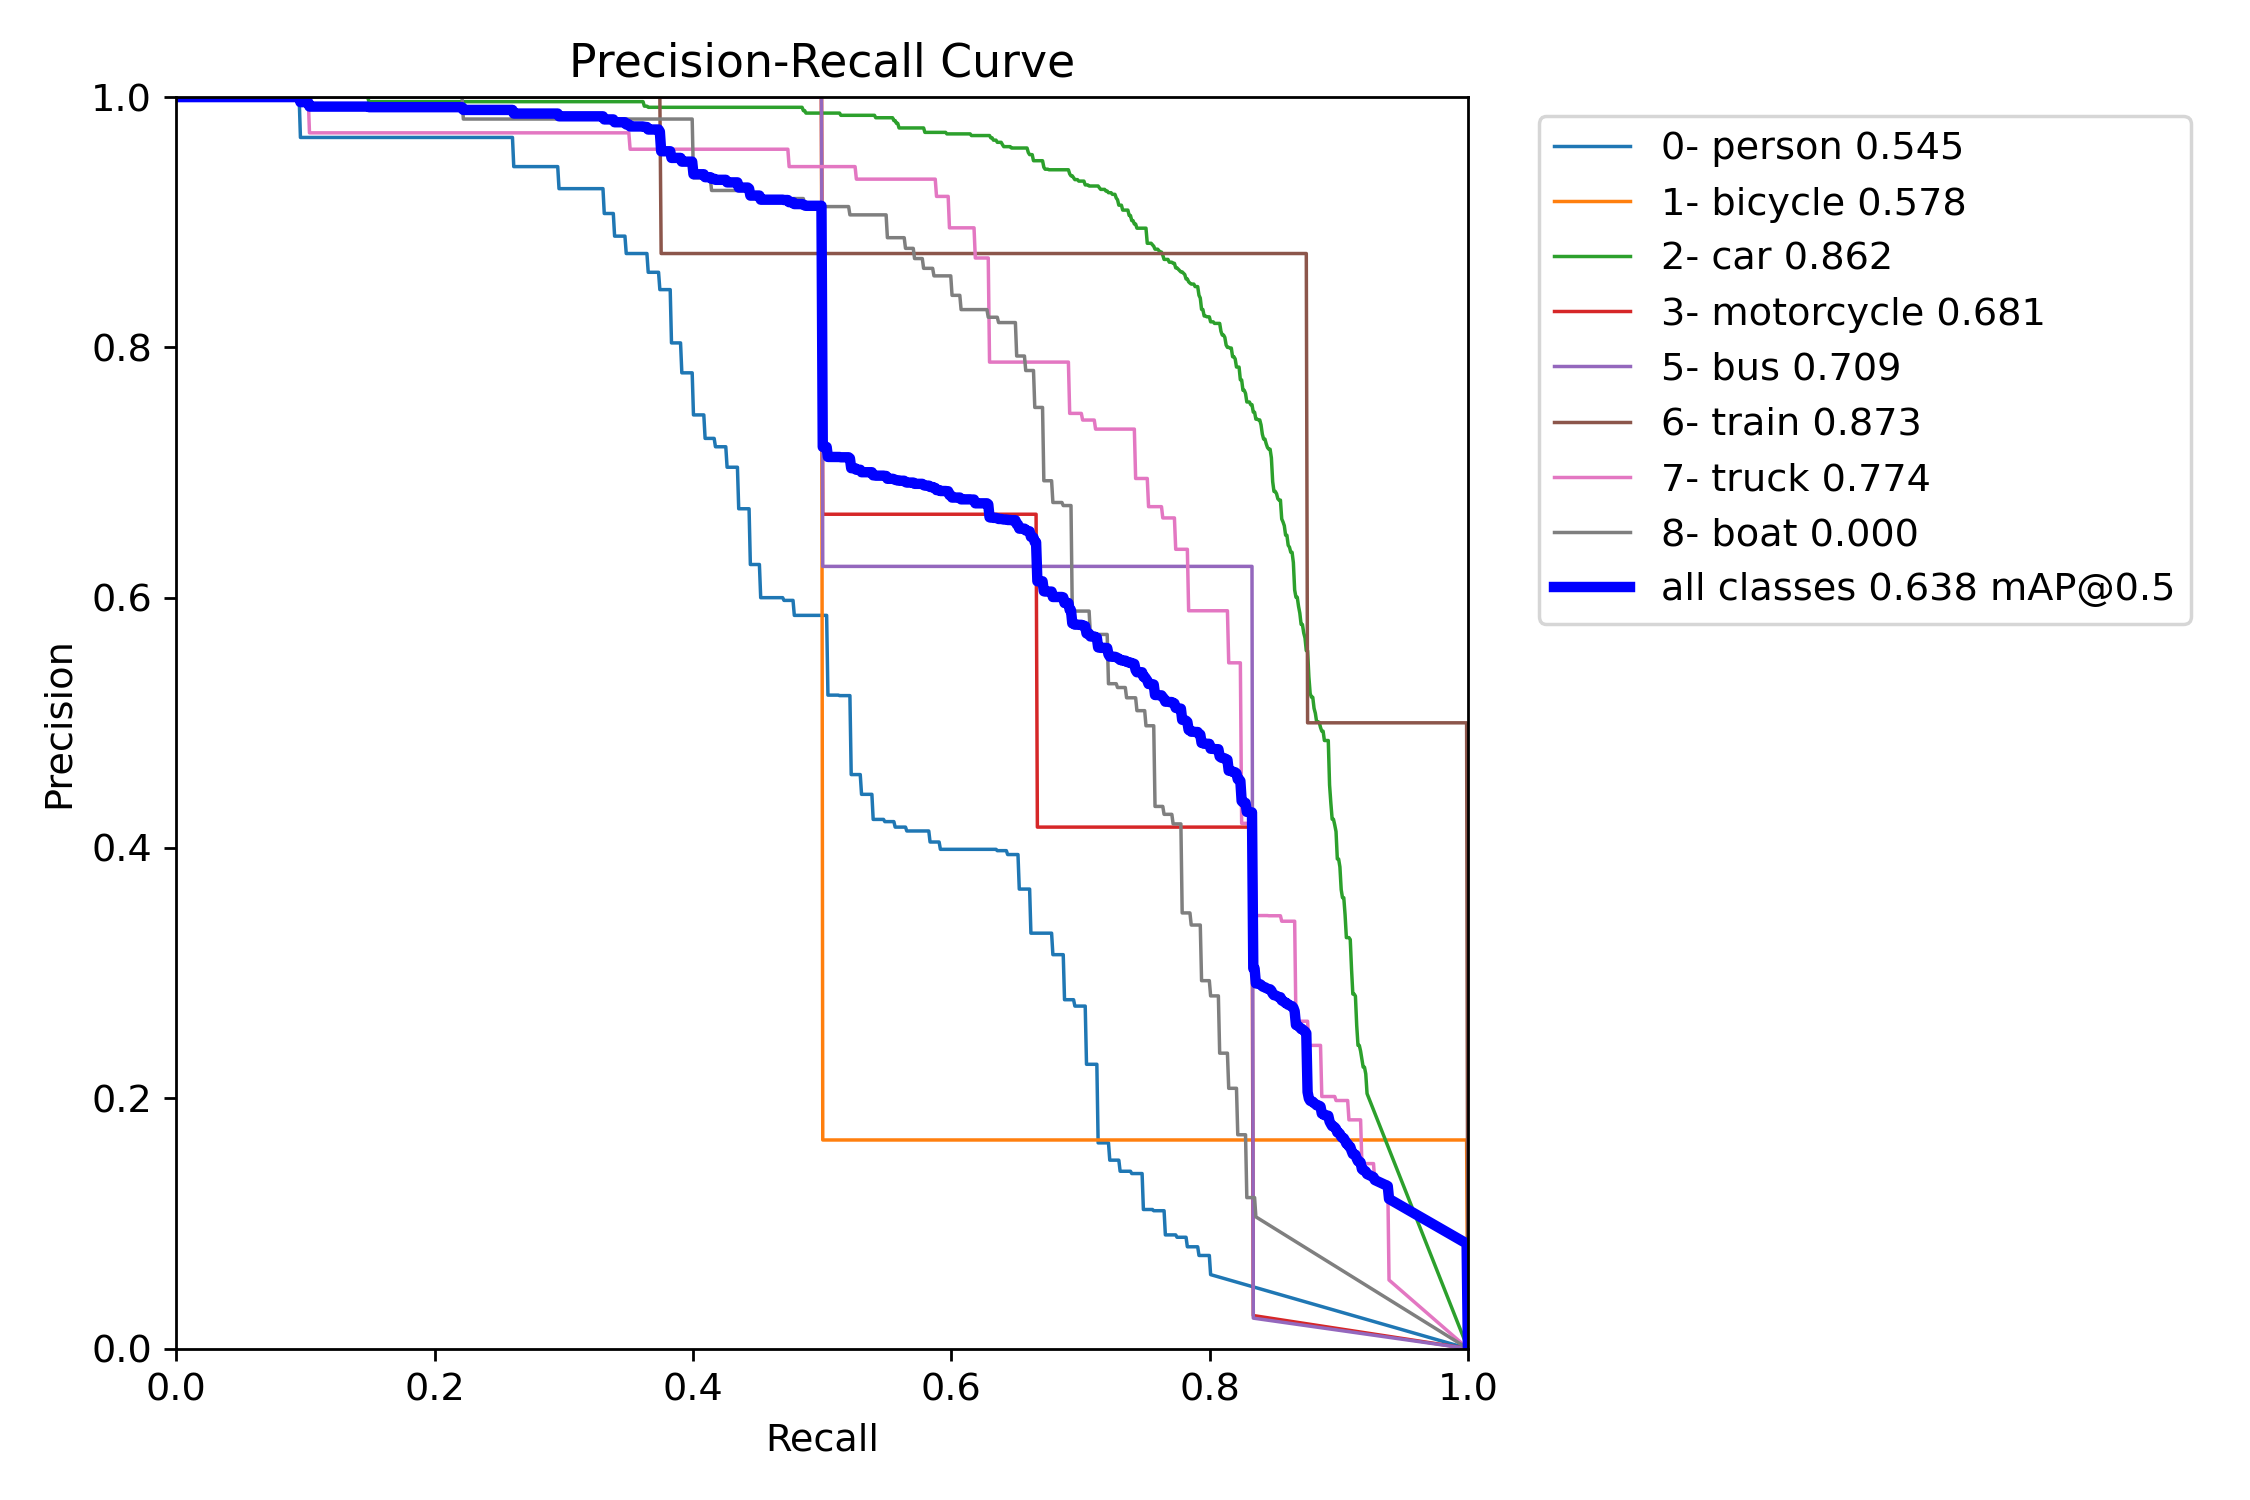

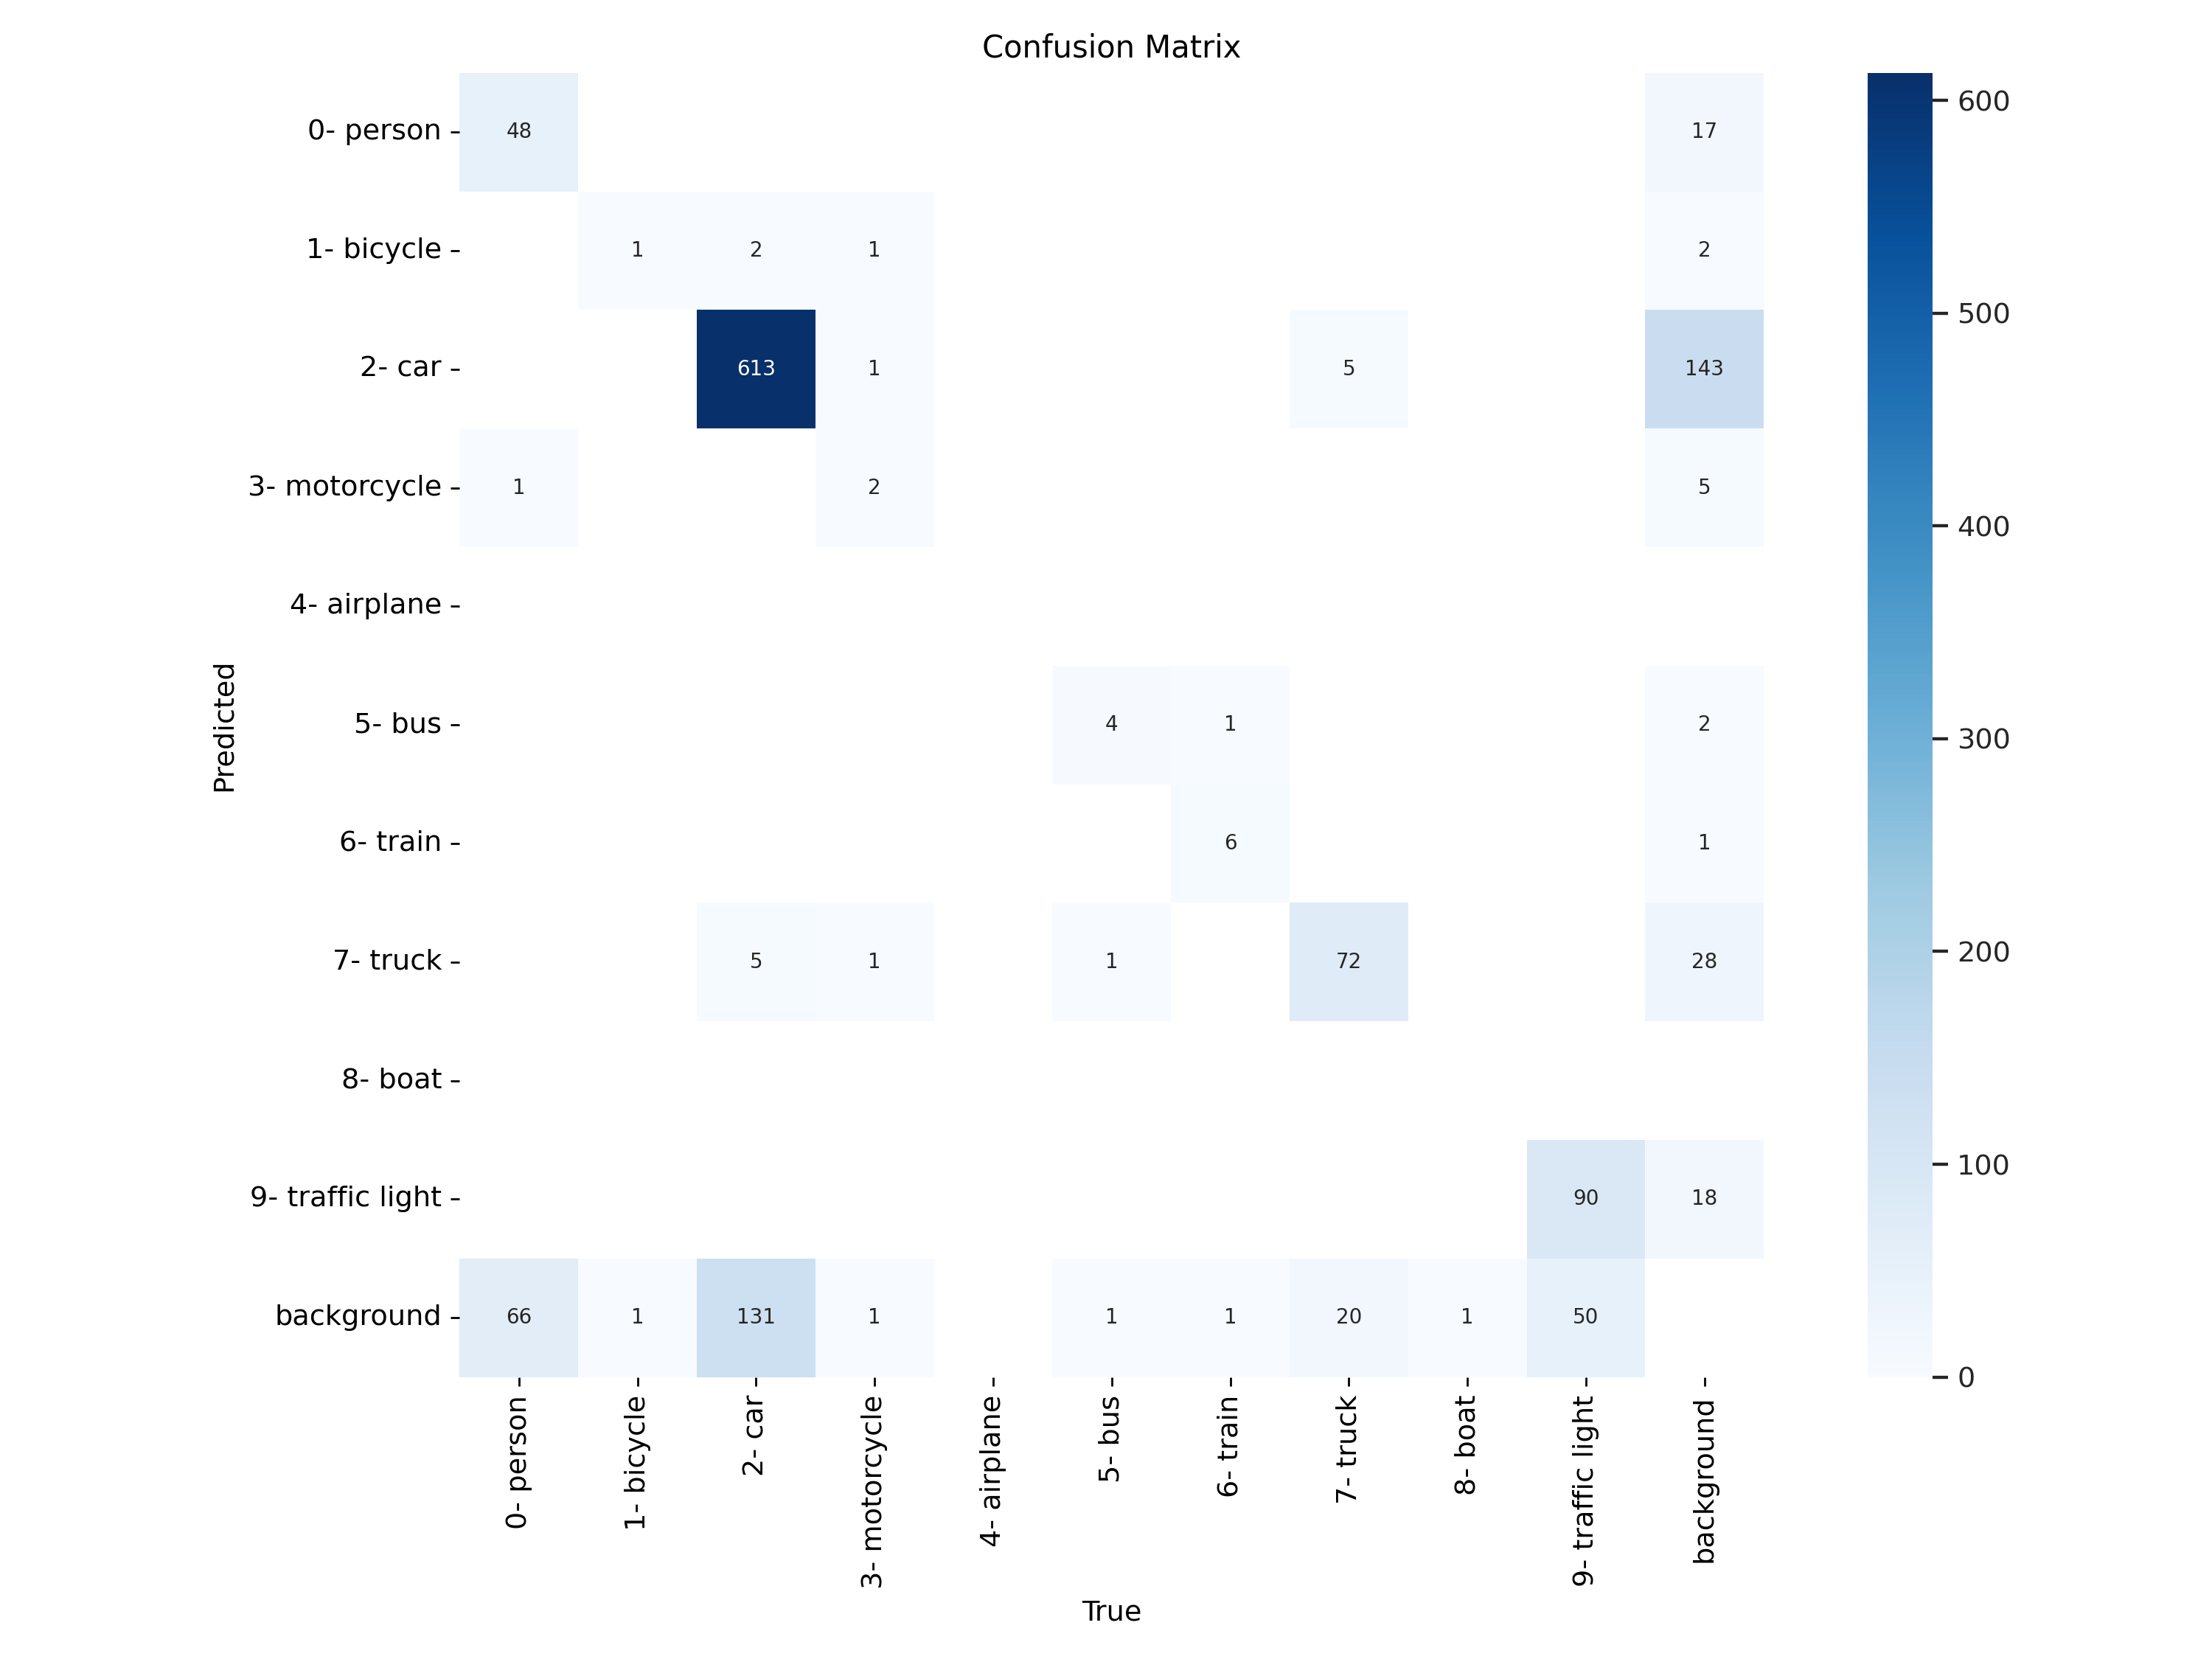

In [7]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png')
y = Image(filename='runs/detect/train/PR_curve.png')
z = Image(filename='runs/detect/train/confusion_matrix.png')
display(x, y,z)

# Comparison

In [7]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,

                       'Precision': precision,
                       'Recall'   : recall,
                       'mAP' : mAP,


                      })

In [8]:
result

ML Model  Precision  Recall    mAP
0   YoloV5x6      0.535   0.576  0.628
1     YoloV4      0.799   0.187  0.256
2  MC-DAYolo      0.812   0.124  0.158
3     YoloV8      0.607   0.580  0.635

# Graph

In [9]:
import numpy as np

In [10]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Precision

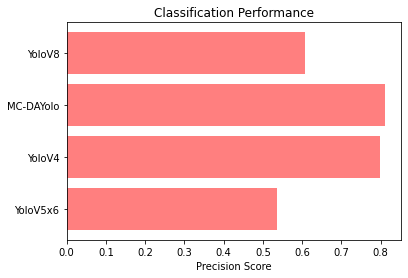

In [12]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

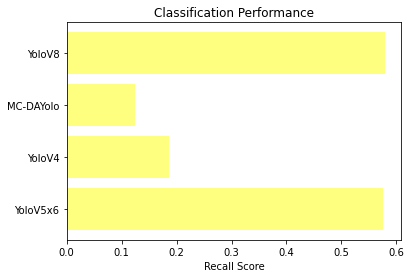

In [13]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# mAP

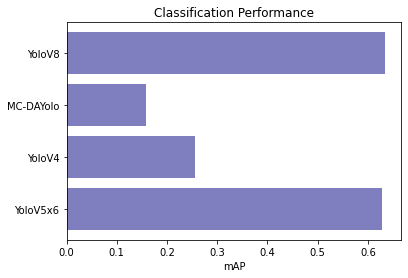

In [14]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mAP, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('mAP')
plt2.title('Classification Performance')
plt2.show()